# **Importing needed libraries**

In [ ]:
from sklearn.preprocessing import normalize 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras import metrics
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import numpy as np
import tarfile
import pickle
import random
import keras
import sys
import gc
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
import keras.models as models
from keras.layers.convolutional import Convolution2D, ZeroPadding2D
from keras.regularizers import *
from keras.utils import np_utils
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.noise import GaussianNoise
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import *

# **(1) Downloading dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tar -xvf '/content/drive/MyDrive/RML2016/RML2016.10b.tar.bz2'

RML2016.10b.dat
LICENSE.TXT


In [ ]:
file = open("RML2016.10b.dat",'rb')
Xd = pickle.load(file, encoding = 'bytes')
snrs, mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = [] 
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)
file.close()

# **(1)(a) Understanding and visulaizing the dataset**

In [ ]:
data = list()  
label = list() 
label.clear();
lbl = np.array(lbl) 

for i in range(len(X)): 
  data.append([X[i][0],X[i][1],lbl[i][1]])
  label.append(lbl[i][0])
  
data = np.array(data);
label = np.array(label)
Xd.clear()

for i in range(1200000):
  if(label[i] == b"8PSK"):
    _8PSK = i
  elif(label[i] == b"BPSK"):
    BPSK = i
  elif(label[i] == b"PAM4"):
    PAM4 = i
  elif(label[i] == b"QPSK"):
    QPSK = i
  elif(label[i] == b"AM-DSB"):
    AM_DSB = i
  elif(label[i] == b"CPFSK"):
    CPFSK = i
  elif(label[i] == b"QAM16"):
    QAM16 = i
  elif(label[i] == b"WBFM"):
    WBFM = i
  elif(label[i] == b"GFSK"):
    GFSK = i
  elif(label[i] == b"QAM64"):
    QAM64 = i

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.


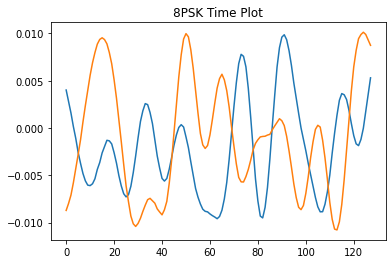

In [ ]:
plt.figure()
plt.title("8PSK Time Plot")
plt.plot(X[_8PSK][0])
plt.plot(X[_8PSK][1])

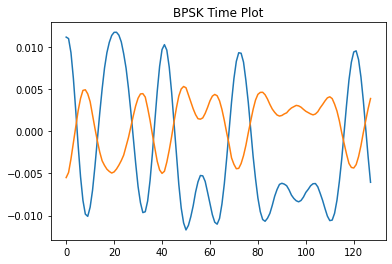

In [ ]:
plt.figure()
plt.title("BPSK Time Plot")
plt.plot(X[BPSK][0])
plt.plot(X[BPSK][1])

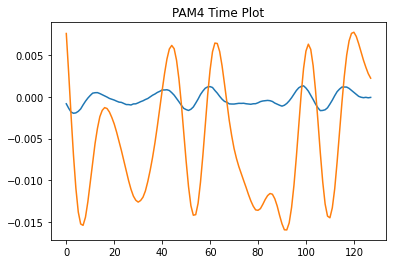

In [ ]:
plt.figure()
plt.title("PAM4 Time Plot")
plt.plot(X[PAM4][0])
plt.plot(X[PAM4][1])

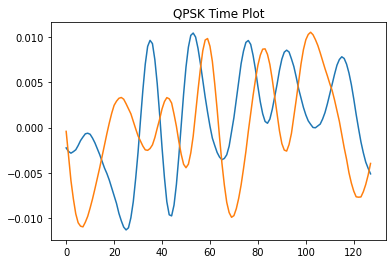

In [ ]:
plt.figure()
plt.title("QPSK Time Plot")
plt.plot(X[QPSK][0])
plt.plot(X[QPSK][1])

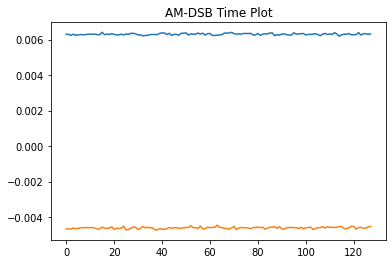

In [ ]:
plt.figure()
plt.title("AM-DSB Time Plot")
plt.plot(X[AM_DSB][0])
plt.plot(X[AM_DSB][1])

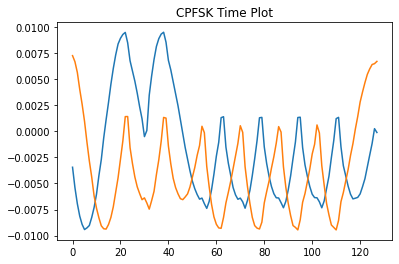

In [ ]:
plt.figure()
plt.title("CPFSK Time Plot")
plt.plot(X[CPFSK][0])
plt.plot(X[CPFSK][1])

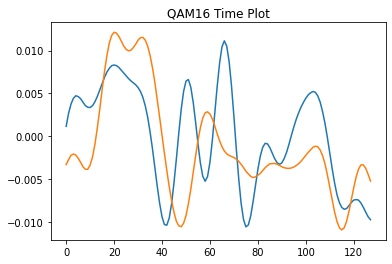

In [ ]:
plt.figure()
plt.title("QAM16 Time Plot")
plt.plot(X[QAM16][0])
plt.plot(X[QAM16][1])

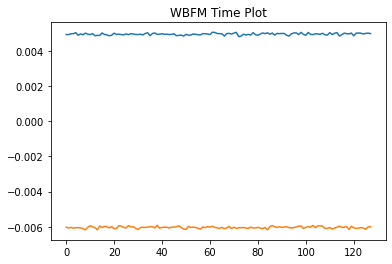

In [ ]:
plt.figure()
plt.title("WBFM Time Plot")
plt.plot(X[WBFM][0])
plt.plot(X[WBFM][1])

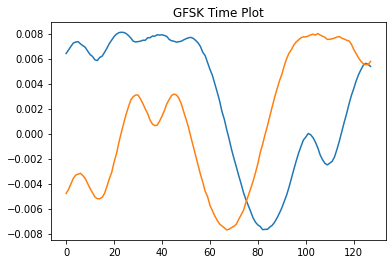

In [ ]:
plt.figure()
plt.title("GFSK Time Plot")
plt.plot(X[GFSK][0])
plt.plot(X[GFSK][1])

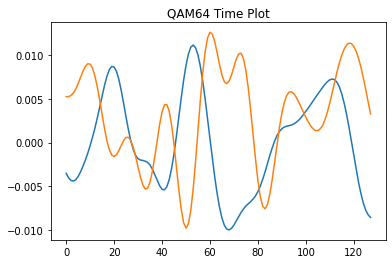

In [ ]:
plt.figure()
plt.title("QAM64 Time Plot")
plt.plot(X[QAM64][0])
plt.plot(X[QAM64][1])

# **Function for encoding labels**

In [ ]:
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1 

# **Function for plotting confusion matrices**

In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', labels=[]):
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# **(2) Create feature space**

**Getting derivatives for dataset**

In [ ]:
X_driv=np.diff(np.array(X))
X_driv=np.concatenate((np.zeros((1200000,2,1)), X_driv), axis=2)

**Getting integrals for dataset**

In [ ]:
import numpy as np
from scipy import integrate

S=integrate.cumtrapz(np.array(X), initial=0)

**Raw data (train/test split)**

In [ ]:
np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.7
train_idx = np.random.choice(range(0,n_examples), size= int(n_train), replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]

Y_train = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), train_idx)))
Y_test = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), test_idx)))

**First derivative of data (train/test split)**

In [ ]:
np.random.seed(2016)
n_train_driv = X_driv.shape[0] * 0.7
train_idx_driv = np.random.choice(range(0,X_driv.shape[0]), size= int(n_train_driv), replace=False)
test_idx_driv = list(set(range(0,X_driv.shape[0]))-set(train_idx_driv))
X_train_driv = X_driv[train_idx_driv]
X_test_driv =  X_driv[test_idx_driv]

Y_train_driv = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), train_idx_driv)))
Y_test_driv = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), test_idx_driv)))

**Integrals of data (train/test split)**

In [ ]:
np.random.seed(2016)
n_train_int = S.shape[0] * 0.7
train_idx_int = np.random.choice(range(0,S.shape[0]), size= int(n_train_int), replace=False)
test_idx_int = list(set(range(0,S.shape[0]))-set(train_idx_int))
X_train_int = S[train_idx_int]
X_test_int =  S[test_idx_int]

Y_train_int = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), train_idx_int)))
Y_test_int = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), test_idx_int)))

**Combination for raw, derivatives and integrals of data (train/test split)**

In [ ]:
combined_Data=np.zeros((1200000,6,128))
for (i) in range(len(combined_Data)):
    combined_Data[i]=np.vstack((X[i],S[i]))

np.random.seed(2016)
n_examples_all = combined_Data.shape[0]
n_train_all = n_examples_all * 0.7
train_idx_all = np.random.choice(range(0,n_examples_all), size= int(n_train_all), replace=False)
test_idx_all = list(set(range(0,n_examples_all))-set(train_idx_all))
X_train_all = combined_Data[train_idx_all]
X_test_all =  combined_Data[test_idx_all]

Y_train_all = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), train_idx_all)))
Y_test_all = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), test_idx_all)))

# **(3) Supervised learning step**

**CNN model for raw data**

In [ ]:
import keras.models as models

dr = 0.1
model = keras.models.Sequential()
model.add(Reshape(list(X_train.shape[1:])+[1], input_shape=list(X_train.shape[1:])))
model.add(ZeroPadding2D((0, 2)))
model.add(Conv2D(64, (1, 3),padding='valid', activation="relu", name="conv1",kernel_initializer='glorot_uniform',data_format="channels_last"))
model.add(Dropout(dr))
model.add(ZeroPadding2D((0, 2)))
model.add(Conv2D(16,(2, 3), padding='valid', activation="relu", name="conv2", kernel_initializer='glorot_uniform',data_format="channels_last"))
model.add(Dropout(dr))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_normal', name="dense1"))
model.add(Dropout(dr))
model.add(Dense( 10, kernel_initializer='he_normal', name="dense2" ))
model.add(Activation('softmax'))
model.add(Reshape([10]))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 2, 128, 1)         0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 2, 132, 1)        0         
 2D)                                                             
                                                                 
 conv1 (Conv2D)              (None, 2, 130, 64)        256       
                                                                 
 dropout (Dropout)           (None, 2, 130, 64)        0         
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 2, 134, 64)       0         
 ng2D)                                                           
                                                                 
 conv2 (Conv2D)              (None, 1, 132, 16)        6

In [ ]:
history_raw = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.05, verbose=2, callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='auto')])

Epoch 1/100
24938/24938 - 95s - loss: 1.4216 - accuracy: 0.4138 - val_loss: 1.1962 - val_accuracy: 0.5018 - 95s/epoch - 4ms/step
Epoch 2/100
24938/24938 - 83s - loss: 1.2096 - accuracy: 0.4960 - val_loss: 1.1338 - val_accuracy: 0.5278 - 83s/epoch - 3ms/step
Epoch 3/100
24938/24938 - 82s - loss: 1.1678 - accuracy: 0.5144 - val_loss: 1.1069 - val_accuracy: 0.5369 - 82s/epoch - 3ms/step
Epoch 4/100
24938/24938 - 82s - loss: 1.1421 - accuracy: 0.5241 - val_loss: 1.0899 - val_accuracy: 0.5431 - 82s/epoch - 3ms/step
Epoch 5/100
24938/24938 - 81s - loss: 1.1287 - accuracy: 0.5292 - val_loss: 1.0717 - val_accuracy: 0.5495 - 81s/epoch - 3ms/step
Epoch 6/100
24938/24938 - 81s - loss: 1.1168 - accuracy: 0.5339 - val_loss: 1.0708 - val_accuracy: 0.5540 - 81s/epoch - 3ms/step
Epoch 7/100
24938/24938 - 82s - loss: 1.1079 - accuracy: 0.5364 - val_loss: 1.0686 - val_accuracy: 0.5524 - 82s/epoch - 3ms/step
Epoch 8/100
24938/24938 - 81s - loss: 1.1031 - accuracy: 0.5392 - val_loss: 1.0884 - val_accuracy

In [ ]:
score = model.evaluate(X_test, Y_test)
print(model.metrics_names)
print (score)

11250/11250 [==============================] - 45s 4ms/step - loss: 1.0399 - accuracy: 0.5635
['loss', 'accuracy']
[1.039883017539978, 0.5635361075401306]


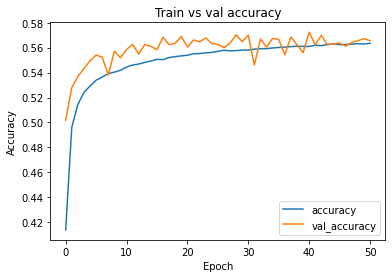

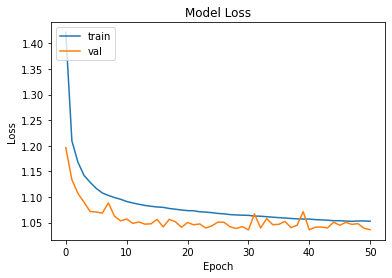

In [ ]:
plt.plot(history_raw.history['accuracy'], label='accuracy')
plt.plot(history_raw.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Train vs val accuracy")
plt.show()

plt.plot(history_raw.history['loss'])
plt.plot(history_raw.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

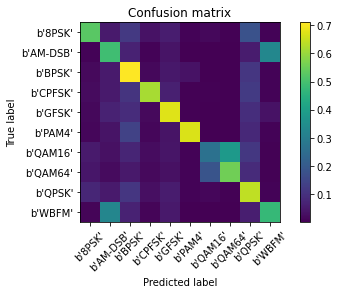

In [ ]:
test_Y_hat = model.predict(X_test)
conf = np.zeros([10,10])
confnorm = np.zeros([10,10])
for i in range(0,X_test.shape[0]):
    j = list(Y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,10):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=mods)

Overall Accuracy:  0.1023517721099702
Overall Accuracy:  0.10685787623458512
Overall Accuracy:  0.11403557686945855
Overall Accuracy:  0.13204176204567025
Overall Accuracy:  0.16911154165513423
Overall Accuracy:  0.24984724768094208
Overall Accuracy:  0.35441778170960964
Overall Accuracy:  0.4844501622105381
Overall Accuracy:  0.618258411396264
Overall Accuracy:  0.7283039955294776
Overall Accuracy:  0.7930861723446894
Overall Accuracy:  0.8157428919128222
Overall Accuracy:  0.8200947449597885
Overall Accuracy:  0.8230083534226608
Overall Accuracy:  0.8315935591338145
Overall Accuracy:  0.8249958451055344
Overall Accuracy:  0.823549032688459
Overall Accuracy:  0.823979167820932
Overall Accuracy:  0.8264931598264932
Overall Accuracy:  0.8261640798226164


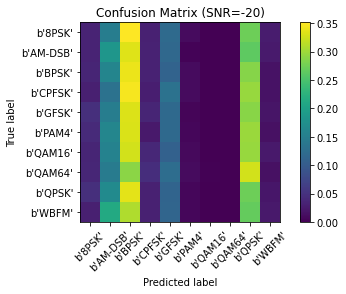

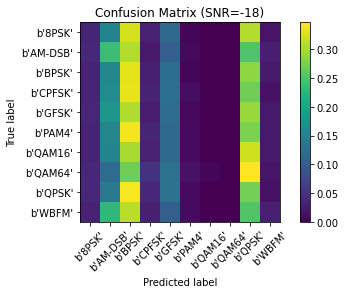

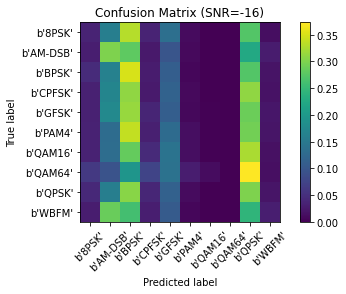

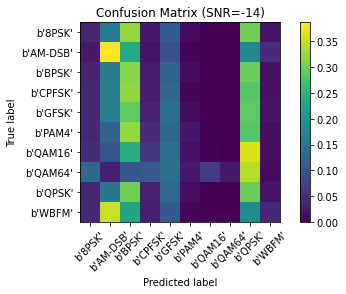

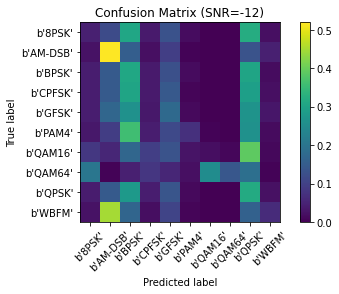

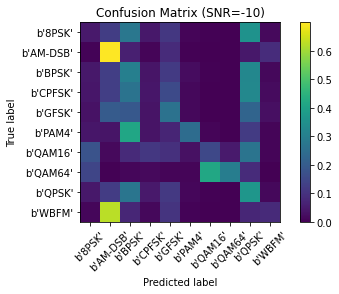

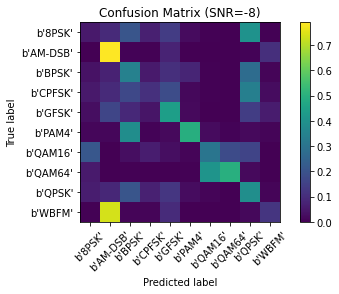

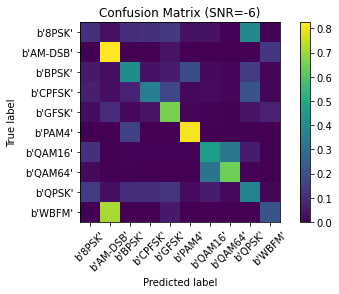

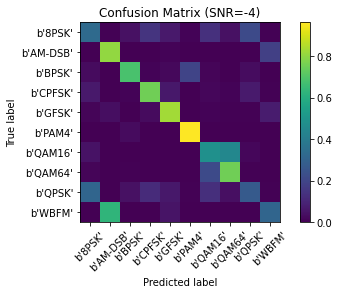

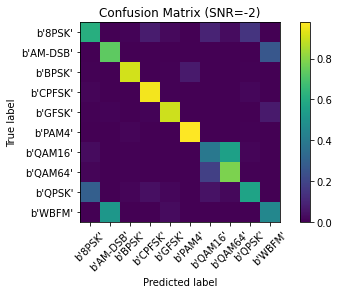

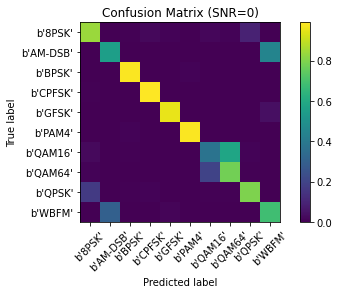

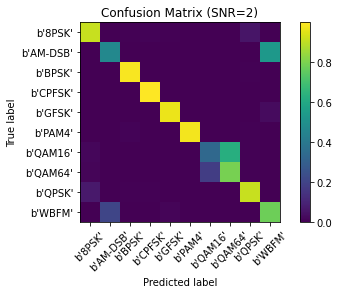

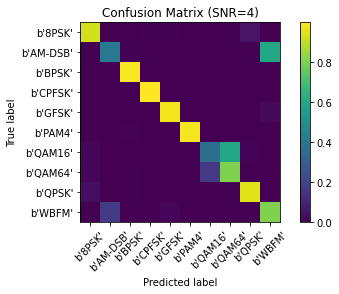

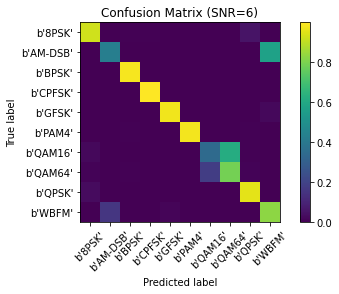

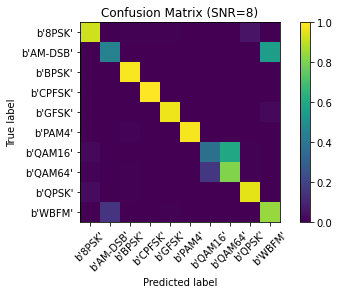

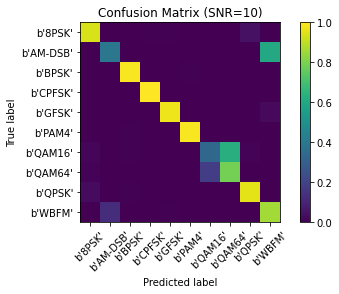

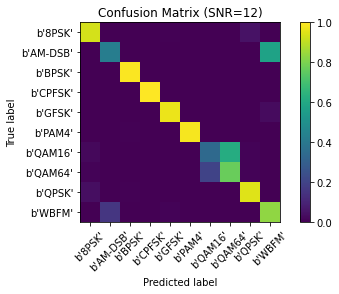

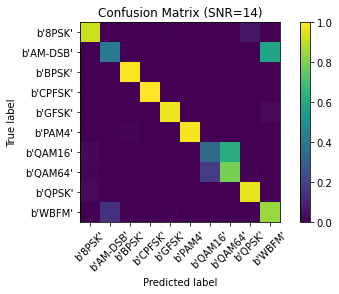

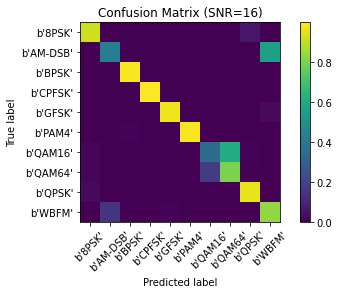

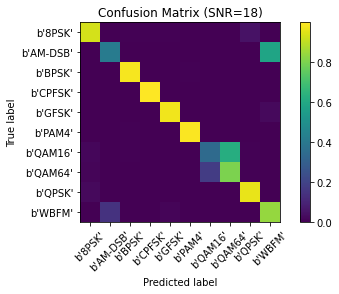

In [ ]:
acc = {}
for snr in snrs:

    test_SNRs = list(map(lambda x: lbl[x][1], test_idx))
    test_X_i = X_test[np.where(np.array(test_SNRs)==snr)]
    test_Y_i = Y_test[np.where(np.array(test_SNRs)==snr)]    

    test_Y_i_hat = model.predict(test_X_i)
    conf = np.zeros([10,10])
    confnorm = np.zeros([10,10])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,10):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm, labels=mods, title="Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print ("Overall Accuracy: ", cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)

Text(0.5, 1.0, 'CNN2 Classification Accuracy')

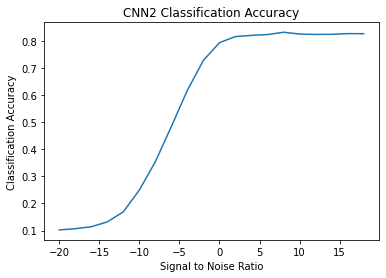

In [ ]:
plt.plot(snrs, list(map(lambda x: acc[x], snrs)))
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("CNN2 Classification Accuracy")

**CNN model for derivatives of data**

In [ ]:
import keras.models as models

dr = 0.1
model1 = keras.models.Sequential()
model1.add(Reshape(list(X_train_driv.shape[1:])+[1], input_shape=list(X_train_driv.shape[1:])))
model1.add(ZeroPadding2D((0, 2)))
model1.add(Conv2D(64, (1, 3),padding='valid', activation="relu", name="conv1",kernel_initializer='glorot_uniform',data_format="channels_last"))
model1.add(Dropout(dr))
model1.add(ZeroPadding2D((0, 2)))
model1.add(Conv2D(16,(2, 3), padding='valid', activation="relu", name="conv2", kernel_initializer='glorot_uniform',data_format="channels_last"))
model1.add(Dropout(dr))
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_normal', name="dense1"))
model1.add(Dropout(dr))
model1.add(Dense( 10, kernel_initializer='he_normal', name="dense2" ))
model1.add(Activation('softmax'))
model1.add(Reshape([10]))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 2, 128, 1)         0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 2, 132, 1)        0         
 2D)                                                             
                                                                 
 conv1 (Conv2D)              (None, 2, 130, 64)        256       
                                                                 
 dropout (Dropout)           (None, 2, 130, 64)        0         
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 2, 134, 64)       0         
 ng2D)                                                           
                                                                 
 conv2 (Conv2D)              (None, 1, 132, 16)        6

In [ ]:
history_driv = model1.fit(X_train_driv, Y_train_driv, epochs=50, batch_size=32, validation_split=0.05, verbose=2, callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='auto')])

Epoch 1/50
24938/24938 - 92s - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.0989 - 92s/epoch - 4ms/step
Epoch 2/50
24938/24938 - 79s - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3026 - val_accuracy: 0.1028 - 79s/epoch - 3ms/step
Epoch 3/50
24938/24938 - 79s - loss: 2.3027 - accuracy: 0.1006 - val_loss: 2.3026 - val_accuracy: 0.1006 - 79s/epoch - 3ms/step
Epoch 4/50
24938/24938 - 87s - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3026 - val_accuracy: 0.0999 - 87s/epoch - 3ms/step
Epoch 5/50
24938/24938 - 81s - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3027 - val_accuracy: 0.0999 - 81s/epoch - 3ms/step
Epoch 6/50
24938/24938 - 80s - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3026 - val_accuracy: 0.1016 - 80s/epoch - 3ms/step
Epoch 7/50
24938/24938 - 79s - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3028 - val_accuracy: 0.0999 - 79s/epoch - 3ms/step
Epoch 8/50
24938/24938 - 79s - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3030 - val_accuracy: 0.0989

In [ ]:
score1 = model1.evaluate(X_test_driv, Y_test_driv)
print(model1.metrics_names)
print (score1)

11250/11250 [==============================] - 30s 3ms/step - loss: 2.3027 - accuracy: 0.0997
['loss', 'accuracy']
[2.302719831466675, 0.09968888759613037]


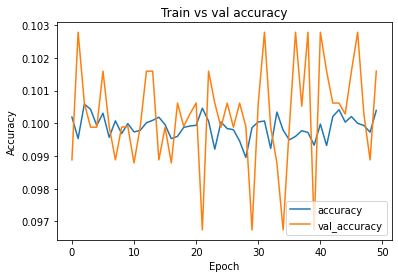

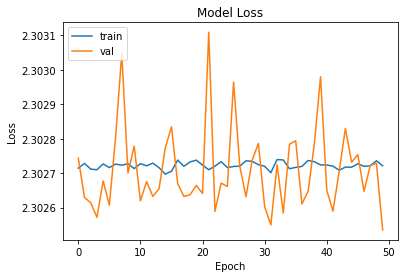

In [ ]:
plt.plot(history_driv.history['accuracy'], label='accuracy')
plt.plot(history_driv.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Train vs val accuracy")
plt.show()

plt.plot(history_driv.history['loss'])
plt.plot(history_driv.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

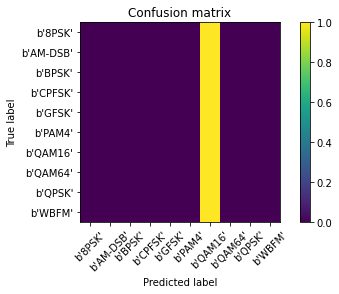

In [ ]:
test_Y_hat_driv = model1.predict(X_test_driv)
conf1 = np.zeros([10,10])
confnorm1 = np.zeros([10,10])
for i in range(0,X_test_driv.shape[0]):
    j = list(Y_test_driv[i,:]).index(1)
    k = int(np.argmax(test_Y_hat_driv[i,:]))
    conf1[j,k] = conf1[j,k] + 1
for i in range(0,10):
    confnorm1[i,:] = conf1[i,:] / np.sum(conf1[i,:])
plot_confusion_matrix(confnorm1, labels=mods)

Overall Accuracy:  0.09881859335320746
Overall Accuracy:  0.10150103230846493
Overall Accuracy:  0.10115429654826298
Overall Accuracy:  0.0974819943051756
Overall Accuracy:  0.1015222806531968
Overall Accuracy:  0.10031661389768372
Overall Accuracy:  0.09908216299900476
Overall Accuracy:  0.10085020695827274
Overall Accuracy:  0.09794357297267335
Overall Accuracy:  0.10226320201173512
Overall Accuracy:  0.10226007570696949
Overall Accuracy:  0.10144927536231885
Overall Accuracy:  0.10267709595681393
Overall Accuracy:  0.09726972024443573
Overall Accuracy:  0.09872293170460855
Overall Accuracy:  0.09916348124757632
Overall Accuracy:  0.09745385812764065
Overall Accuracy:  0.09922987423125935
Overall Accuracy:  0.09848737626515404
Overall Accuracy:  0.09611973392461197


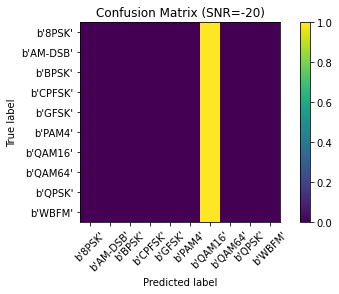

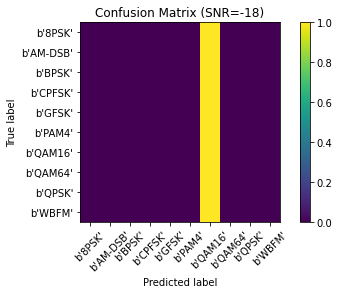

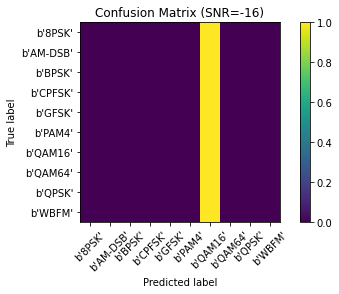

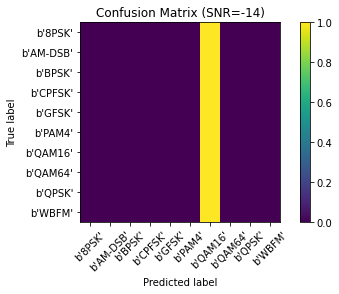

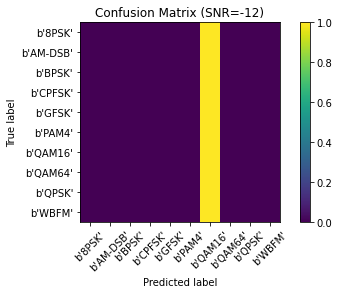

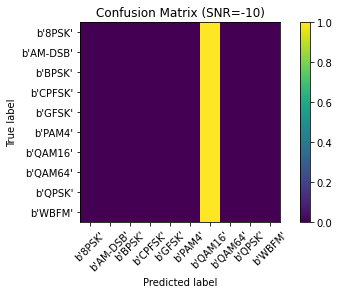

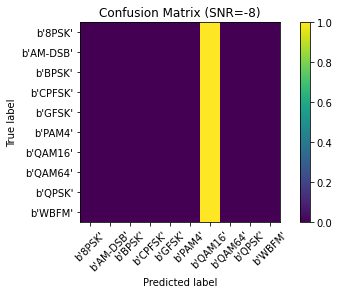

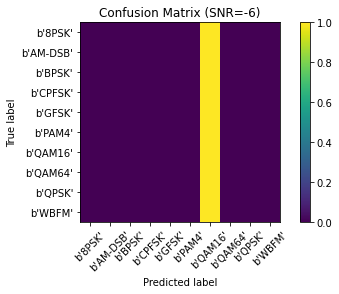

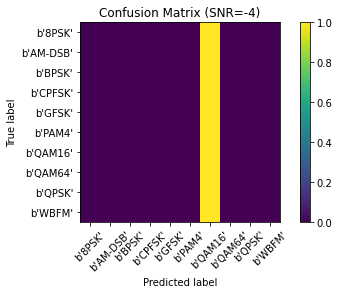

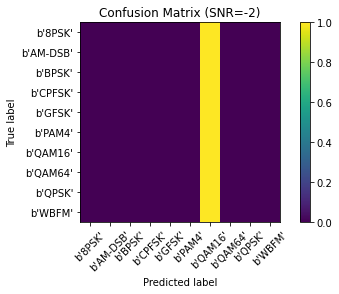

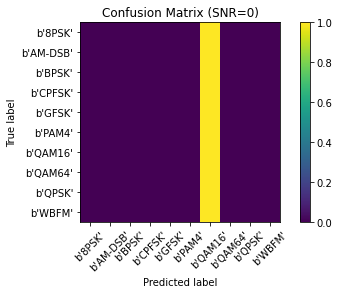

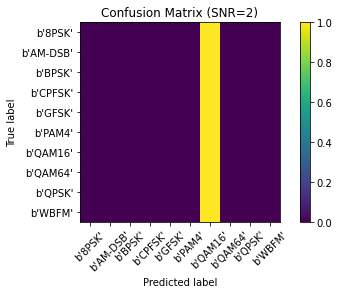

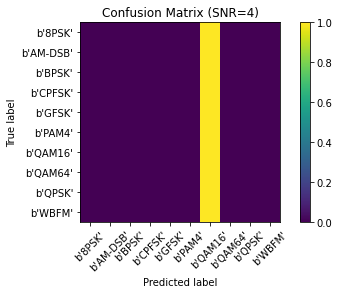

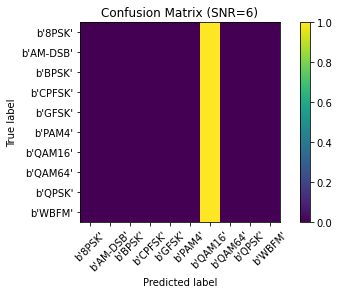

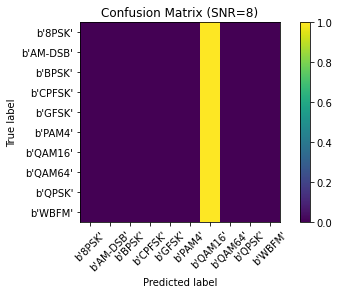

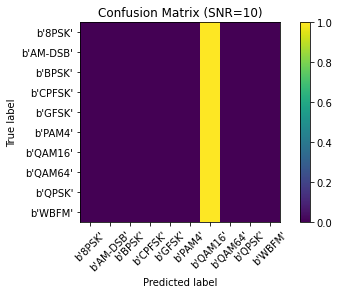

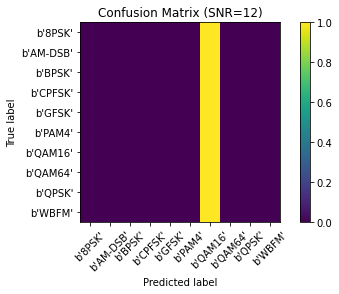

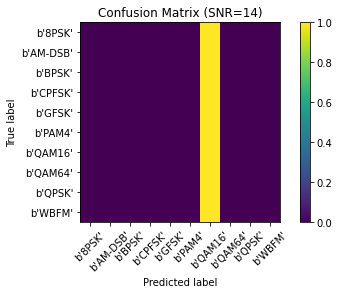

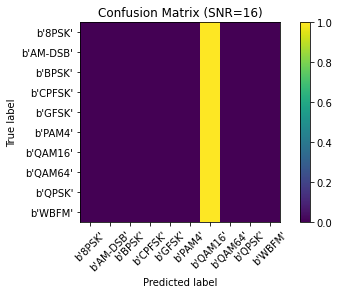

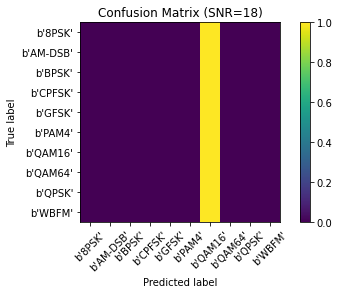

In [ ]:
acc1 = {}
for snr in snrs:

    test_SNRs_driv = list(map(lambda x: lbl[x][1], test_idx_driv))
    test_X_i_driv = X_test_driv[np.where(np.array(test_SNRs_driv)==snr)]
    test_Y_i_driv = Y_test_driv[np.where(np.array(test_SNRs_driv)==snr)]    

    test_Y_i_hat_driv = model1.predict(test_X_i_driv)
    conf1 = np.zeros([10,10])
    confnorm1 = np.zeros([10,10])
    for i in range(0,test_X_i_driv.shape[0]):
        j = list(test_Y_i_driv[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat_driv[i,:]))
        conf1[j,k] = conf1[j,k] + 1
    for i in range(0,10):
        confnorm1[i,:] = conf1[i,:] / np.sum(conf1[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm1, labels=mods, title="Confusion Matrix (SNR=%d)"%(snr))
    
    cor1 = np.sum(np.diag(conf1))
    ncor1 = np.sum(conf1) - cor1
    print ("Overall Accuracy: ", cor1 / (cor1+ncor1))
    acc1[snr] = 1.0*cor1/(cor1+ncor1)

Text(0.5, 1.0, 'CNN2 Classification Accuracy')

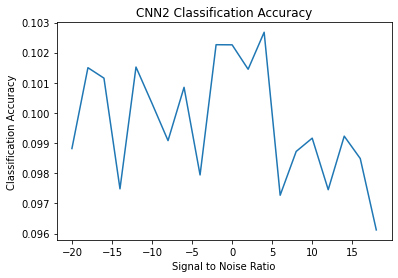

In [ ]:
plt.plot(snrs, list(map(lambda x: acc1[x], snrs)))
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("CNN2 Classification Accuracy")

**CNN model for integrals of data**

In [ ]:
import keras.models as models

dr = 0.1
model2 = keras.models.Sequential()
model2.add(Reshape(list(X_train_int.shape[1:])+[1], input_shape=list(X_train_int.shape[1:])))
model2.add(ZeroPadding2D((0, 2)))
model2.add(Conv2D(64, (1, 3),padding='valid', activation="relu", name="conv1",kernel_initializer='glorot_uniform',data_format="channels_last"))
model2.add(Dropout(dr))
model2.add(ZeroPadding2D((0, 2)))
model2.add(Conv2D(16,(2, 3), padding='valid', activation="relu", name="conv2", kernel_initializer='glorot_uniform',data_format="channels_last"))
model2.add(Dropout(dr))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_normal', name="dense1"))
model2.add(Dropout(dr))
model2.add(Dense( 10, kernel_initializer='he_normal', name="dense2" ))
model2.add(Activation('softmax'))
model2.add(Reshape([10]))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 2, 128, 1)         0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 2, 132, 1)        0         
 2D)                                                             
                                                                 
 conv1 (Conv2D)              (None, 2, 130, 64)        256       
                                                                 
 dropout (Dropout)           (None, 2, 130, 64)        0         
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 2, 134, 64)       0         
 ng2D)                                                           
                                                                 
 conv2 (Conv2D)              (None, 1, 132, 16)        6

In [ ]:
history_int = model2.fit(X_train_int, Y_train_int, epochs=200, batch_size=32, validation_split=0.05, verbose=2, callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='auto')])

Epoch 1/200
24938/24938 - 92s - loss: 1.7512 - accuracy: 0.3045 - val_loss: 1.6003 - val_accuracy: 0.3603 - 92s/epoch - 4ms/step
Epoch 2/200
24938/24938 - 80s - loss: 1.6161 - accuracy: 0.3523 - val_loss: 1.5460 - val_accuracy: 0.3738 - 80s/epoch - 3ms/step
Epoch 3/200
24938/24938 - 80s - loss: 1.5767 - accuracy: 0.3648 - val_loss: 1.5191 - val_accuracy: 0.3813 - 80s/epoch - 3ms/step
Epoch 4/200
24938/24938 - 81s - loss: 1.5302 - accuracy: 0.3780 - val_loss: 1.4757 - val_accuracy: 0.3945 - 81s/epoch - 3ms/step
Epoch 5/200
24938/24938 - 80s - loss: 1.4955 - accuracy: 0.3886 - val_loss: 1.4330 - val_accuracy: 0.4068 - 80s/epoch - 3ms/step
Epoch 6/200
24938/24938 - 80s - loss: 1.4670 - accuracy: 0.3994 - val_loss: 1.3960 - val_accuracy: 0.4273 - 80s/epoch - 3ms/step
Epoch 7/200
24938/24938 - 80s - loss: 1.4400 - accuracy: 0.4102 - val_loss: 1.3891 - val_accuracy: 0.4301 - 80s/epoch - 3ms/step
Epoch 8/200
24938/24938 - 79s - loss: 1.4174 - accuracy: 0.4198 - val_loss: 1.3822 - val_accuracy

In [ ]:
score2 = model2.evaluate(X_test_int, Y_test_int)
print(model2.metrics_names)
print (score2)

11250/11250 [==============================] - 29s 3ms/step - loss: 1.1058 - accuracy: 0.5338
['loss', 'accuracy']
[1.1057634353637695, 0.5337861180305481]


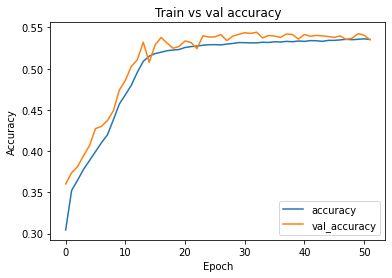

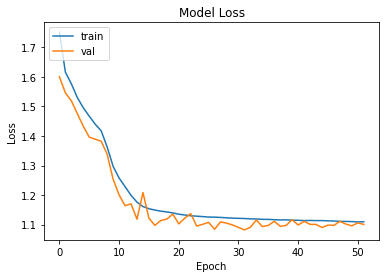

In [ ]:
plt.plot(history_int.history['accuracy'], label='accuracy')
plt.plot(history_int.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Train vs val accuracy")
plt.show()

plt.plot(history_int.history['loss'])
plt.plot(history_int.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

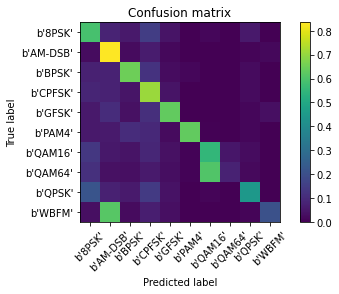

In [ ]:
test_Y_hat_int = model2.predict(X_test_int)
conf2 = np.zeros([10,10])
confnorm2 = np.zeros([10,10])
for i in range(0,X_test_int.shape[0]):
    j = list(Y_test_int[i,:]).index(1)
    k = int(np.argmax(test_Y_hat_int[i,:]))
    conf2[j,k] = conf2[j,k] + 1
for i in range(0,10):
    confnorm2[i,:] = conf2[i,:] / np.sum(conf2[i,:])
plot_confusion_matrix(confnorm2, labels=mods)

Overall Accuracy:  0.10687865739207243
Overall Accuracy:  0.11054070643379275
Overall Accuracy:  0.11509507611665644
Overall Accuracy:  0.1358383116520574
Overall Accuracy:  0.15222806531967895
Overall Accuracy:  0.1944675887352108
Overall Accuracy:  0.28386597368130045
Overall Accuracy:  0.43041727262557333
Overall Accuracy:  0.5586719139737265
Overall Accuracy:  0.6654372729812796
Overall Accuracy:  0.7502783344466711
Overall Accuracy:  0.7906848102666224
Overall Accuracy:  0.7906797400022034
Overall Accuracy:  0.7961540617816898
Overall Accuracy:  0.797223764575236
Overall Accuracy:  0.8013406459475929
Overall Accuracy:  0.8024238381142984
Overall Accuracy:  0.7966092304282786
Overall Accuracy:  0.7970192414636859
Overall Accuracy:  0.7975609756097561


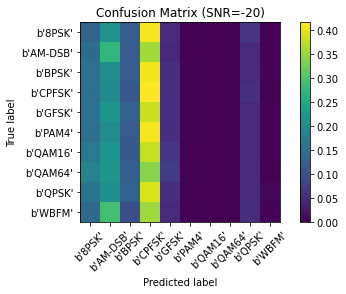

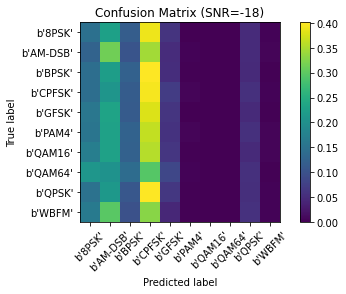

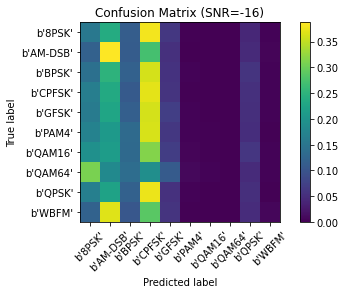

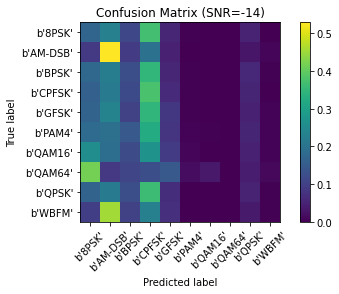

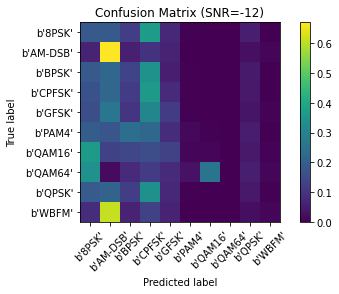

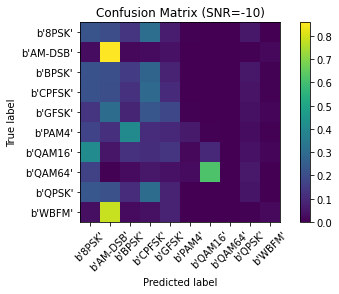

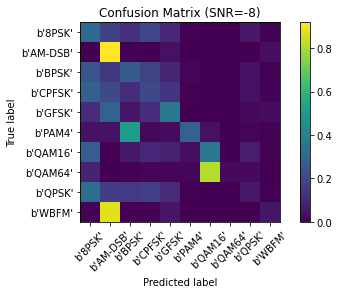

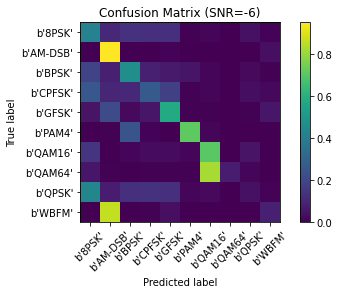

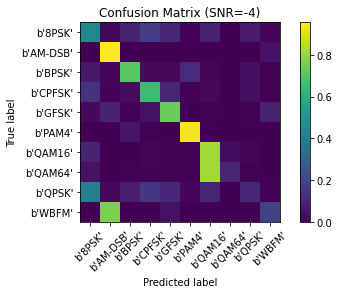

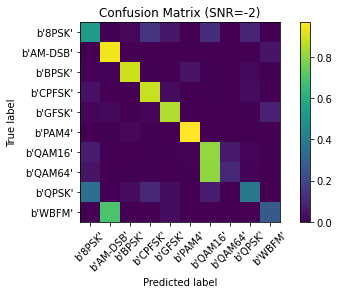

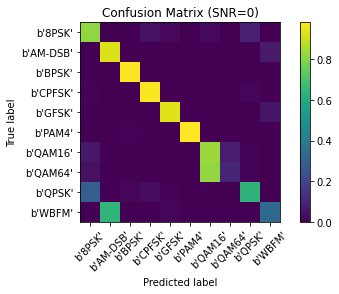

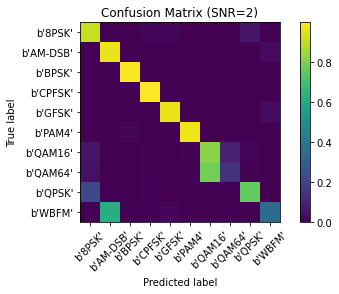

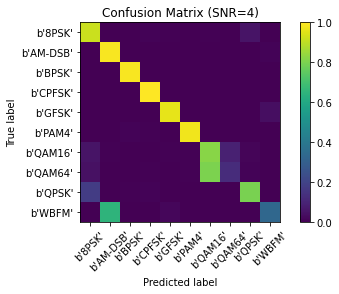

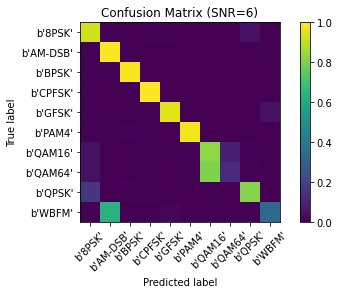

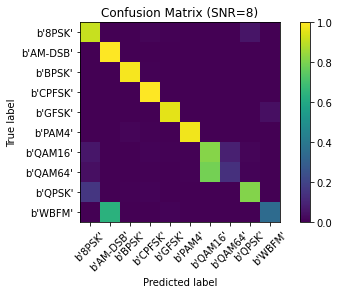

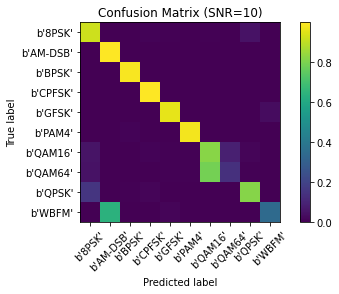

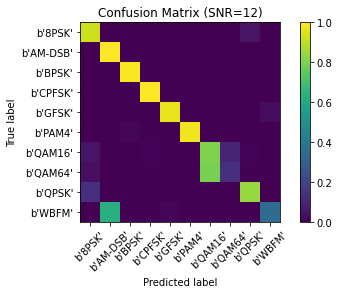

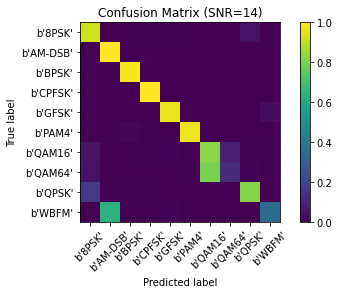

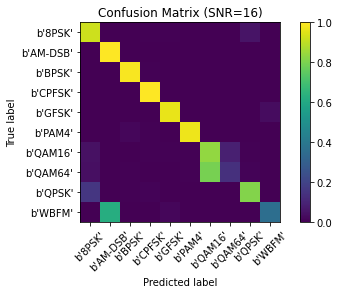

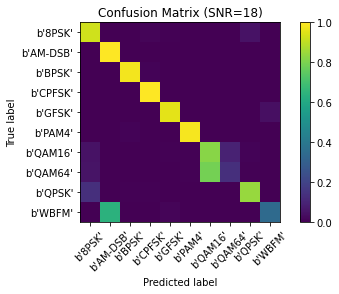

In [ ]:
acc2 = {}
for snr in snrs:

    test_SNRs_int = list(map(lambda x: lbl[x][1], test_idx_int))
    test_X_i_int = X_test_int[np.where(np.array(test_SNRs_int)==snr)]
    test_Y_i_int = Y_test_int[np.where(np.array(test_SNRs_int)==snr)]    

    test_Y_i_hat_int = model2.predict(test_X_i_int)
    conf2 = np.zeros([10,10])
    confnorm2 = np.zeros([10,10])
    for i in range(0,test_X_i_int.shape[0]):
        j = list(test_Y_i_int[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat_int[i,:]))
        conf2[j,k] = conf2[j,k] + 1
    for i in range(0,10):
        confnorm2[i,:] = conf2[i,:] / np.sum(conf2[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm2, labels=mods, title="Confusion Matrix (SNR=%d)"%(snr))
    
    cor2 = np.sum(np.diag(conf2))
    ncor2 = np.sum(conf2) - cor2
    print ("Overall Accuracy: ", cor2 / (cor2+ncor2))
    acc2[snr] = 1.0*cor2/(cor2+ncor2)

Text(0.5, 1.0, 'CNN2 Classification Accuracy')

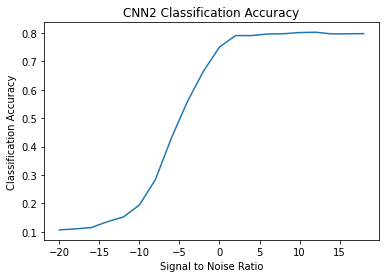

In [ ]:
plt.plot(snrs, list(map(lambda x: acc2[x], snrs)))
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("CNN2 Classification Accuracy")

**RNN model for raw data**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler

model3 = Sequential()
model3.add(SimpleRNN(64, input_shape=list(X_train.shape[1:]), activation='relu'))
model3.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model3.add(Dense(units=10, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 21,962
Trainable params: 21,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_rnn_raw = model3.fit(X_train, Y_train, epochs=200, batch_size=32, validation_split=0.05, verbose=2, callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='auto')])

Epoch 1/200
24938/24938 - 99s - loss: 1.6207 - accuracy: 0.3383 - val_loss: 1.4805 - val_accuracy: 0.3837 - 99s/epoch - 4ms/step
Epoch 2/200
24938/24938 - 99s - loss: 1.4534 - accuracy: 0.3943 - val_loss: 1.4212 - val_accuracy: 0.4064 - 99s/epoch - 4ms/step
Epoch 3/200
24938/24938 - 98s - loss: 1.3888 - accuracy: 0.4146 - val_loss: 1.3638 - val_accuracy: 0.4220 - 98s/epoch - 4ms/step
Epoch 4/200
24938/24938 - 100s - loss: 1.3526 - accuracy: 0.4281 - val_loss: 1.3353 - val_accuracy: 0.4332 - 100s/epoch - 4ms/step
Epoch 5/200
24938/24938 - 97s - loss: 1.3349 - accuracy: 0.4351 - val_loss: 1.3336 - val_accuracy: 0.4350 - 97s/epoch - 4ms/step
Epoch 6/200
24938/24938 - 102s - loss: 1.3252 - accuracy: 0.4395 - val_loss: 1.3227 - val_accuracy: 0.4396 - 102s/epoch - 4ms/step
Epoch 7/200
24938/24938 - 98s - loss: 1.3168 - accuracy: 0.4432 - val_loss: 1.3213 - val_accuracy: 0.4426 - 98s/epoch - 4ms/step
Epoch 8/200
24938/24938 - 101s - loss: 1.3104 - accuracy: 0.4460 - val_loss: 1.3065 - val_acc

In [ ]:
score3 = model3.evaluate(X_test, Y_test)
print(model3.metrics_names)
print (score3)

11250/11250 [==============================] - 29s 3ms/step - loss: 1.1706 - accuracy: 0.5035
['loss', 'accuracy']
[1.1705892086029053, 0.5034944415092468]


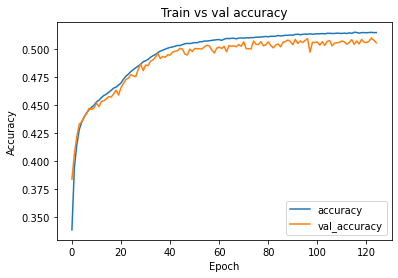

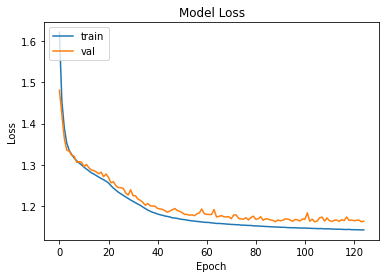

In [ ]:
plt.plot(history_rnn_raw.history['accuracy'], label='accuracy')
plt.plot(history_rnn_raw.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Train vs val accuracy")
plt.show()

plt.plot(history_rnn_raw.history['loss'])
plt.plot(history_rnn_raw.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

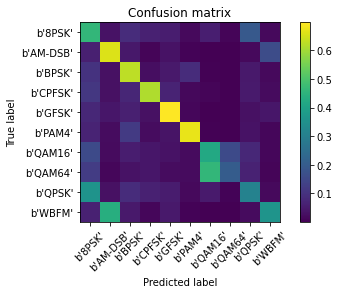

In [ ]:
test_Y_hat = model3.predict(X_test)
conf3 = np.zeros([10,10])
confnorm3 = np.zeros([10,10])
for i in range(0,X_test.shape[0]):
    j = list(Y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf3[j,k] = conf3[j,k] + 1
for i in range(0,10):
    confnorm3[i,:] = conf3[i,:] / np.sum(conf3[i,:])
plot_confusion_matrix(confnorm3, labels=mods)

Overall Accuracy:  0.10384233189797946
Overall Accuracy:  0.11104291055186652
Overall Accuracy:  0.11643339095522222
Overall Accuracy:  0.13907654513985818
Overall Accuracy:  0.17149183504013285
Overall Accuracy:  0.2549019607843137
Overall Accuracy:  0.342917173504368
Overall Accuracy:  0.43276652869448484
Overall Accuracy:  0.527742364613935
Overall Accuracy:  0.6139703827884884
Overall Accuracy:  0.6762413716321531
Overall Accuracy:  0.7128000885053657
Overall Accuracy:  0.7233667511292278
Overall Accuracy:  0.7338678028816505
Overall Accuracy:  0.7335369239311493
Overall Accuracy:  0.7361365021328459
Overall Accuracy:  0.7329330664887703
Overall Accuracy:  0.7341126932240013
Overall Accuracy:  0.7329551773996218
Overall Accuracy:  0.7375277161862528


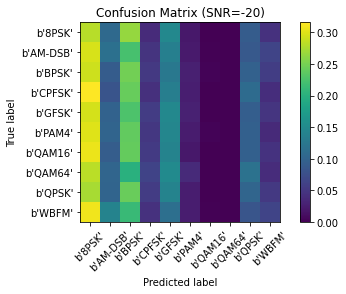

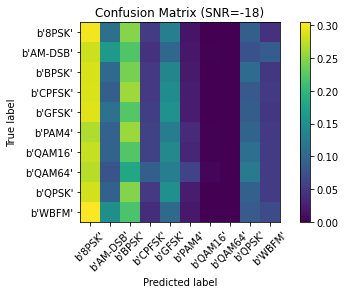

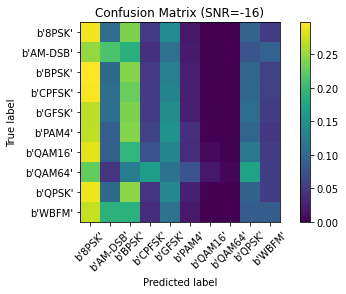

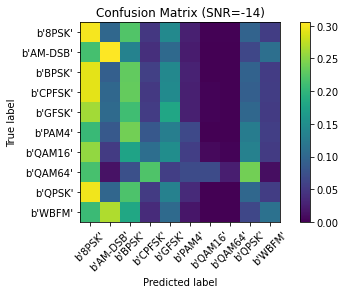

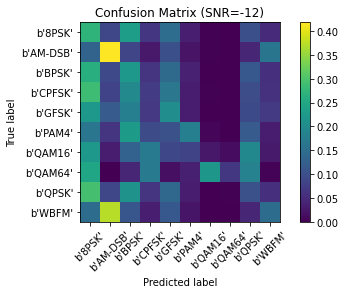

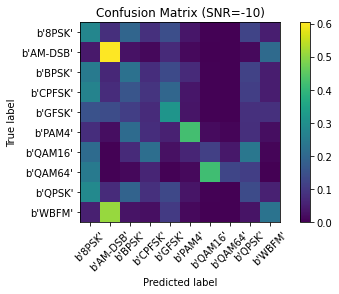

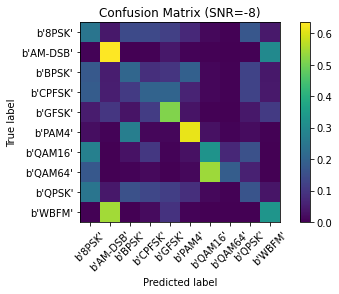

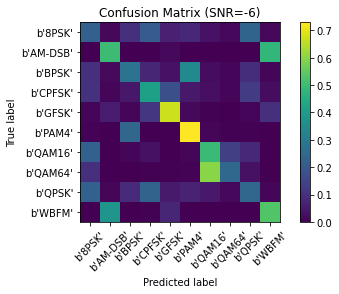

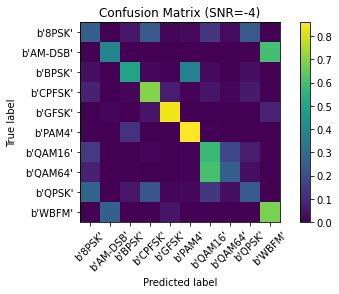

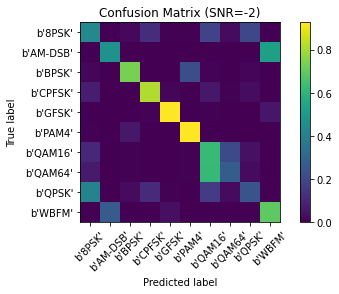

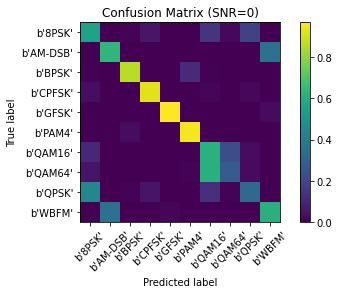

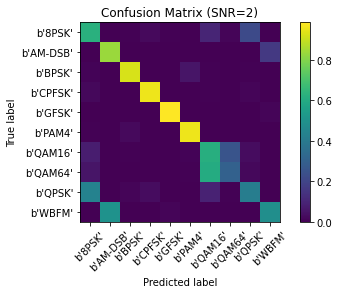

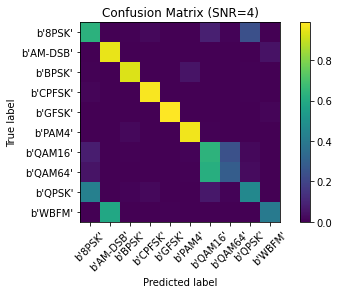

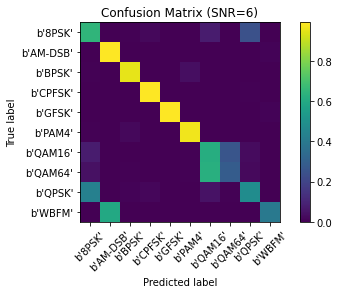

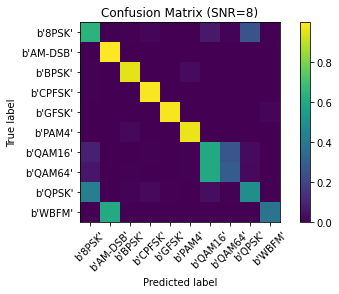

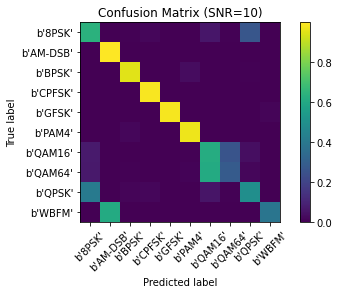

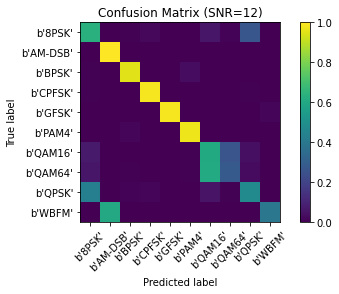

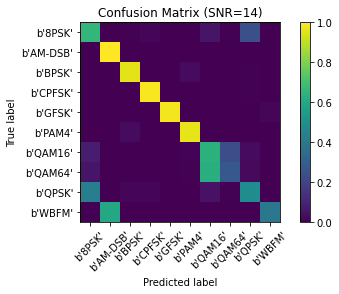

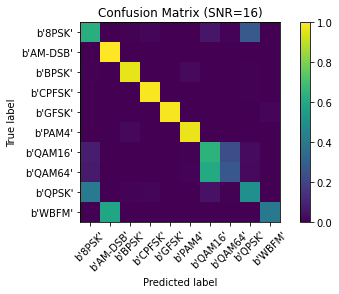

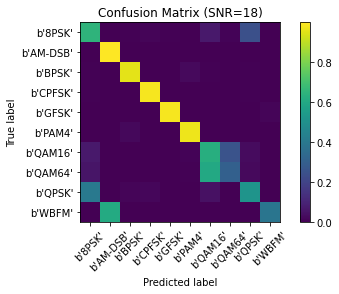

In [ ]:
acc3 = {}
for snr in snrs:

    test_SNRs = list(map(lambda x: lbl[x][1], test_idx))
    test_X_i = X_test[np.where(np.array(test_SNRs)==snr)]
    test_Y_i = Y_test[np.where(np.array(test_SNRs)==snr)]    

    test_Y_i_hat = model3.predict(test_X_i)
    conf3 = np.zeros([10,10])
    confnorm3 = np.zeros([10,10])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf3[j,k] = conf3[j,k] + 1
    for i in range(0,10):
        confnorm3[i,:] = conf3[i,:] / np.sum(conf3[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm3, labels=mods, title="Confusion Matrix (SNR=%d)"%(snr))
    
    cor3 = np.sum(np.diag(conf3))
    ncor3 = np.sum(conf3) - cor3
    print ("Overall Accuracy: ", cor3 / (cor3+ncor3))
    acc3[snr] = 1.0*cor3/(cor3+ncor3)

Text(0.5, 1.0, 'RNN Classification Accuracy')

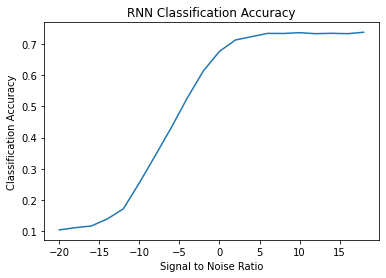

In [ ]:
plt.plot(snrs, list(map(lambda x: acc3[x], snrs)))
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("RNN Classification Accuracy")

**RNN model for integrals of data**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler

model5 = Sequential()
model5.add(SimpleRNN(64, input_shape=list(X_train_int.shape[1:]), activation='relu'))
model5.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model5.add(Dense(units=10, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 21,962
Trainable params: 21,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_rnn_int = model5.fit(X_train_int, Y_train_int, epochs=200, batch_size=32, validation_split=0.05, verbose=2, callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='auto')])

Epoch 1/200
24938/24938 - 82s - loss: 1.6398 - accuracy: 0.3211 - val_loss: 1.5246 - val_accuracy: 0.3602 - 82s/epoch - 3ms/step
Epoch 2/200
24938/24938 - 58s - loss: 1.4945 - accuracy: 0.3704 - val_loss: 1.4563 - val_accuracy: 0.3859 - 58s/epoch - 2ms/step
Epoch 3/200
24938/24938 - 57s - loss: 1.4428 - accuracy: 0.3948 - val_loss: 1.4163 - val_accuracy: 0.4028 - 57s/epoch - 2ms/step
Epoch 4/200
24938/24938 - 56s - loss: 1.4061 - accuracy: 0.4110 - val_loss: 1.3917 - val_accuracy: 0.4172 - 56s/epoch - 2ms/step
Epoch 5/200
24938/24938 - 56s - loss: 1.3780 - accuracy: 0.4237 - val_loss: 1.3603 - val_accuracy: 0.4323 - 56s/epoch - 2ms/step
Epoch 6/200
24938/24938 - 56s - loss: 1.3538 - accuracy: 0.4338 - val_loss: 1.3414 - val_accuracy: 0.4420 - 56s/epoch - 2ms/step
Epoch 7/200
24938/24938 - 59s - loss: 1.3343 - accuracy: 0.4429 - val_loss: 1.3159 - val_accuracy: 0.4492 - 59s/epoch - 2ms/step
Epoch 8/200
24938/24938 - 54s - loss: 1.3196 - accuracy: 0.4496 - val_loss: 1.3156 - val_accuracy

In [ ]:
score5 = model5.evaluate(X_test_int, Y_test_int)
print(model5.metrics_names)
print (score5)

11250/11250 [==============================] - 26s 2ms/step - loss: 1.1971 - accuracy: 0.4984
['loss', 'accuracy']
[1.197102427482605, 0.49838611483573914]


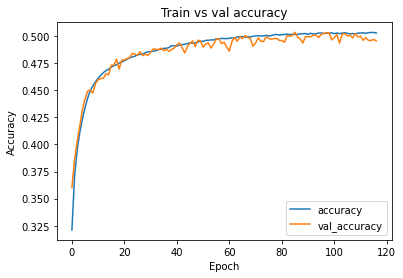

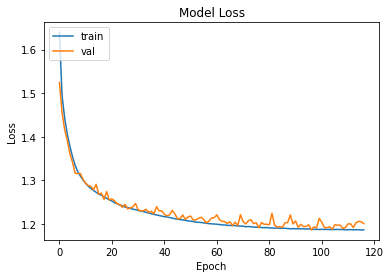

In [ ]:
plt.plot(history_rnn_int.history['accuracy'], label='accuracy')
plt.plot(history_rnn_int.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Train vs val accuracy")
plt.show()

plt.plot(history_rnn_int.history['loss'])
plt.plot(history_rnn_int.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

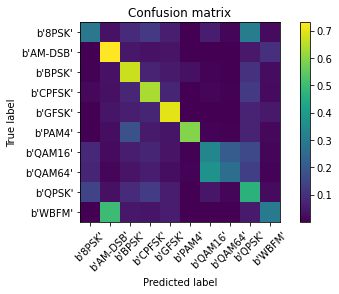

In [ ]:
test_Y_hat_int = model5.predict(X_test_int)
conf5 = np.zeros([10,10])
confnorm5 = np.zeros([10,10])
for i in range(0,X_test_int.shape[0]):
    j = list(Y_test_int[i,:]).index(1)
    k = int(np.argmax(test_Y_hat_int[i,:]))
    conf5[j,k] = conf5[j,k] + 1
for i in range(0,10):
    confnorm5[i,:] = conf5[i,:] / np.sum(conf5[i,:])
plot_confusion_matrix(confnorm5, labels=mods)

Overall Accuracy:  0.10814839350778403
Overall Accuracy:  0.10557446571061883
Overall Accuracy:  0.11632186471867507
Overall Accuracy:  0.13410753168443973
Overall Accuracy:  0.1617492388596734
Overall Accuracy:  0.23362772871188137
Overall Accuracy:  0.32433926794205464
Overall Accuracy:  0.4351717194317038
Overall Accuracy:  0.5504683775843912
Overall Accuracy:  0.6092763341715564
Overall Accuracy:  0.6683366733466933
Overall Accuracy:  0.7051665007191061
Overall Accuracy:  0.7163159634240388
Overall Accuracy:  0.7254022537422212
Overall Accuracy:  0.7320932815102721
Overall Accuracy:  0.7291562794305024
Overall Accuracy:  0.7290971758950411
Overall Accuracy:  0.72729791124162
Overall Accuracy:  0.7266155043932822
Overall Accuracy:  0.7272727272727273


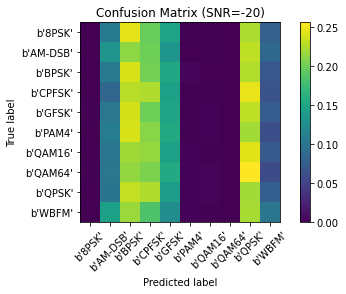

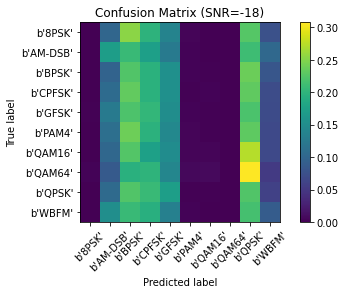

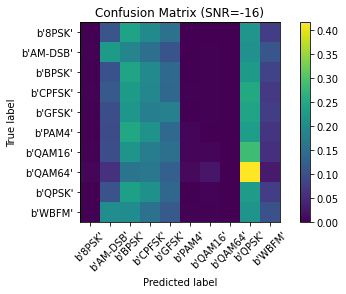

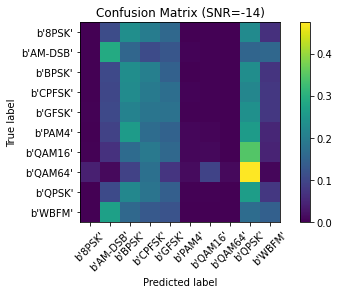

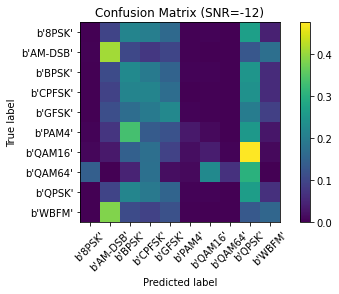

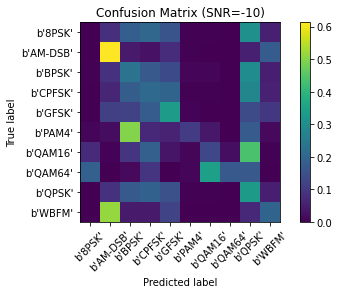

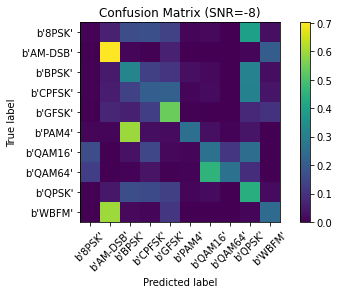

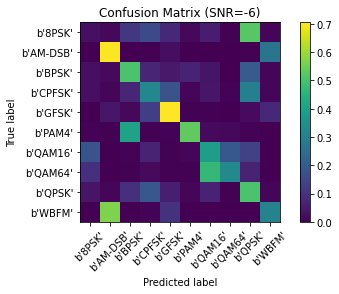

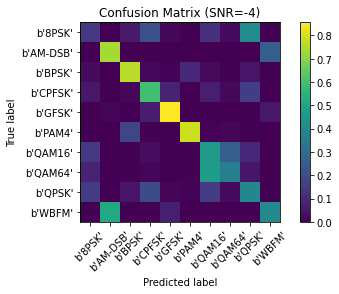

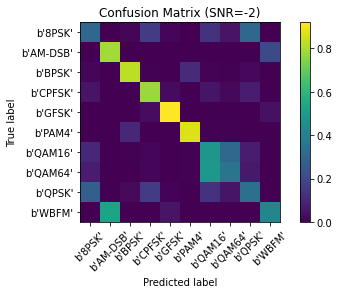

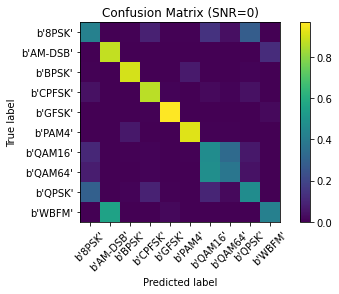

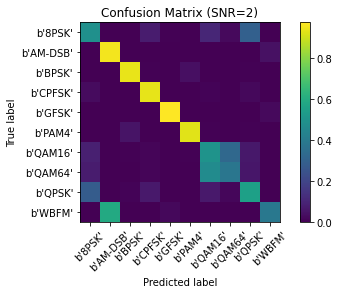

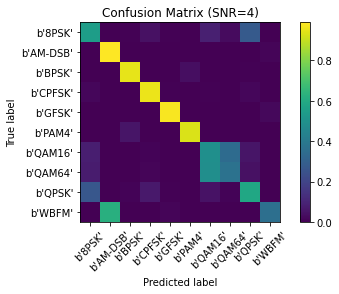

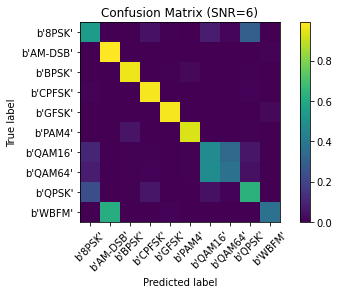

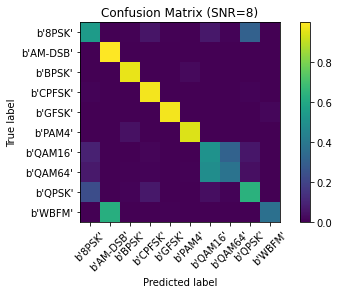

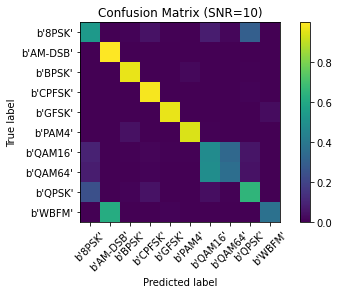

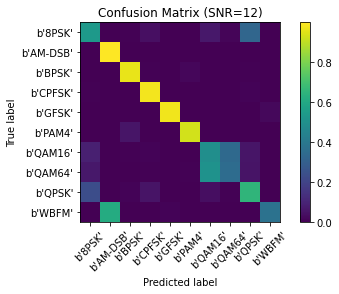

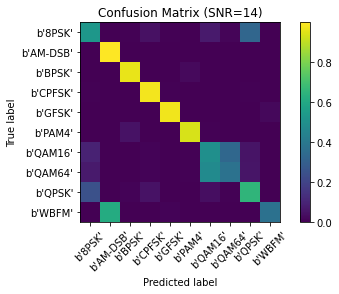

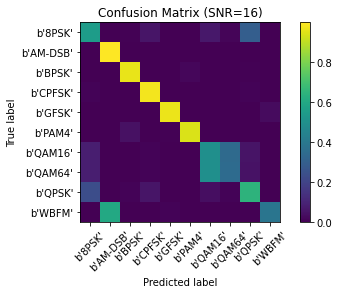

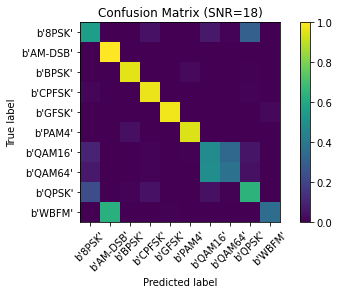

In [ ]:
acc5 = {}
for snr in snrs:

    test_SNRs_int = list(map(lambda x: lbl[x][1], test_idx_int))
    test_X_i_int = X_test_int[np.where(np.array(test_SNRs_int)==snr)]
    test_Y_i_int = Y_test_int[np.where(np.array(test_SNRs_int)==snr)]    

    test_Y_i_hat_int = model5.predict(test_X_i_int)
    conf5 = np.zeros([10,10])
    confnorm5 = np.zeros([10,10])
    for i in range(0,test_X_i_int.shape[0]):
        j = list(test_Y_i_int[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat_int[i,:]))
        conf5[j,k] = conf5[j,k] + 1
    for i in range(0,10):
        confnorm5[i,:] = conf5[i,:] / np.sum(conf5[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm5, labels=mods, title="Confusion Matrix (SNR=%d)"%(snr))
    
    cor5 = np.sum(np.diag(conf5))
    ncor5 = np.sum(conf5) - cor5
    print ("Overall Accuracy: ", cor5 / (cor5+ncor5))
    acc5[snr] = 1.0*cor5/(cor5+ncor5)

Text(0.5, 1.0, 'RNN Classification Accuracy')

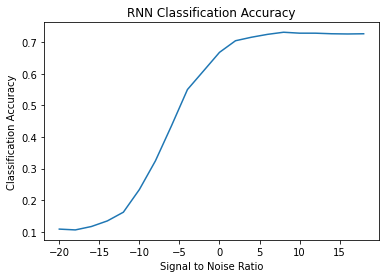

In [ ]:
plt.plot(snrs, list(map(lambda x: acc5[x], snrs)))
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("RNN Classification Accuracy")

**RNN model for derivatives of data**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler

model7 = Sequential()
model7.add(SimpleRNN(64, input_shape=list(X_train_driv.shape[1:]), activation='relu'))
model7.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model7.add(Dense(units=10, activation='softmax'))
model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 21,962
Trainable params: 21,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_rnn_driv = model7.fit(X_train_driv, Y_train_driv, epochs=100, batch_size=32, validation_split=0.05, verbose=2, callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='auto')])

Epoch 1/100
24938/24938 - 49s - loss: 2.2934 - accuracy: 0.1192 - val_loss: 2.2920 - val_accuracy: 0.1180 - 49s/epoch - 2ms/step
Epoch 2/100
24938/24938 - 49s - loss: 2.2903 - accuracy: 0.1203 - val_loss: 2.2871 - val_accuracy: 0.1179 - 49s/epoch - 2ms/step
Epoch 3/100
24938/24938 - 49s - loss: 2.2773 - accuracy: 0.1306 - val_loss: 2.2664 - val_accuracy: 0.1373 - 49s/epoch - 2ms/step
Epoch 4/100
24938/24938 - 53s - loss: 2.2483 - accuracy: 0.1439 - val_loss: 2.2043 - val_accuracy: 0.1655 - 53s/epoch - 2ms/step
Epoch 5/100
24938/24938 - 50s - loss: 1.9822 - accuracy: 0.2179 - val_loss: 1.7644 - val_accuracy: 0.2816 - 50s/epoch - 2ms/step
Epoch 6/100
24938/24938 - 49s - loss: 1.6963 - accuracy: 0.3048 - val_loss: 1.6601 - val_accuracy: 0.3176 - 49s/epoch - 2ms/step
Epoch 7/100
24938/24938 - 49s - loss: 1.6489 - accuracy: 0.3194 - val_loss: 1.6372 - val_accuracy: 0.3224 - 49s/epoch - 2ms/step
Epoch 8/100
24938/24938 - 51s - loss: 1.6337 - accuracy: 0.3233 - val_loss: 1.6227 - val_accuracy

In [ ]:
score7 = model7.evaluate(X_test_driv, Y_test_driv)
print(model7.metrics_names)
print (score7)

11250/11250 [==============================] - 23s 2ms/step - loss: 1.4691 - accuracy: 0.3751
['loss', 'accuracy']
[1.4691197872161865, 0.37514999508857727]


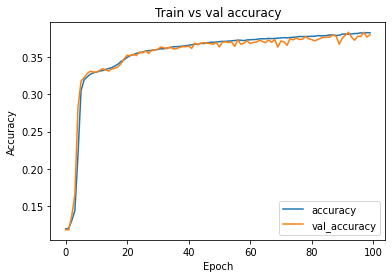

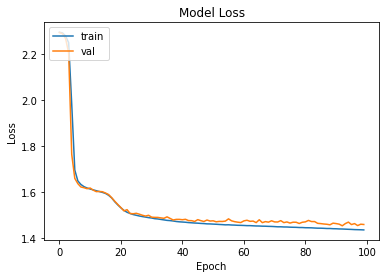

In [ ]:
plt.plot(history_rnn_driv.history['accuracy'], label='accuracy')
plt.plot(history_rnn_driv.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Train vs val accuracy")
plt.show()

plt.plot(history_rnn_driv.history['loss'])
plt.plot(history_rnn_driv.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

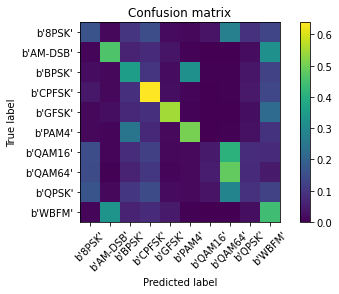

In [ ]:
test_Y_hat_driv = model7.predict(X_test_driv)
conf7 = np.zeros([10,10])
confnorm7 = np.zeros([10,10])
for i in range(0,X_test_driv.shape[0]):
    j = list(Y_test_driv[i,:]).index(1)
    k = int(np.argmax(test_Y_hat_driv[i,:]))
    conf7[j,k] = conf7[j,k] + 1
for i in range(0,10):
    confnorm7[i,:] = conf7[i,:] / np.sum(conf7[i,:])
plot_confusion_matrix(confnorm7, labels=mods)

Overall Accuracy:  0.09754885723749586
Overall Accuracy:  0.09887841080296858
Overall Accuracy:  0.10344058439747951
Overall Accuracy:  0.10144603874713863
Overall Accuracy:  0.12261278715748686
Overall Accuracy:  0.1573071154807532
Overall Accuracy:  0.21303770872498065
Overall Accuracy:  0.26988477458328675
Overall Accuracy:  0.3417770633556898
Overall Accuracy:  0.4246437552388935
Overall Accuracy:  0.5138053885548876
Overall Accuracy:  0.5587454364420843
Overall Accuracy:  0.5798722044728435
Overall Accuracy:  0.5845713965352918
Overall Accuracy:  0.5697390338700722
Overall Accuracy:  0.5629051022104039
Overall Accuracy:  0.5539248387814099
Overall Accuracy:  0.5494487229209375
Overall Accuracy:  0.5533867200533867
Overall Accuracy:  0.5440133037694014


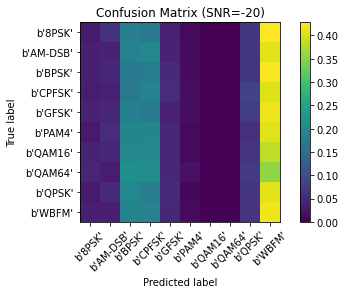

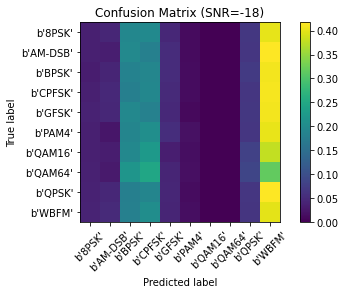

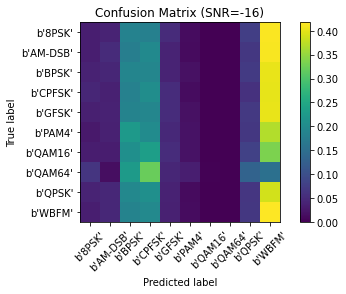

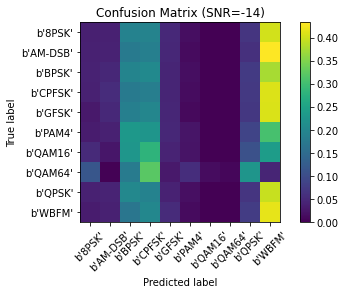

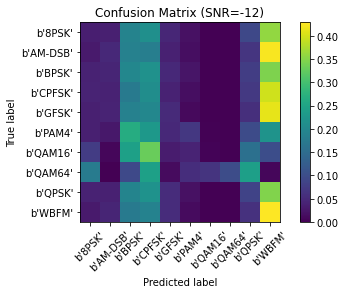

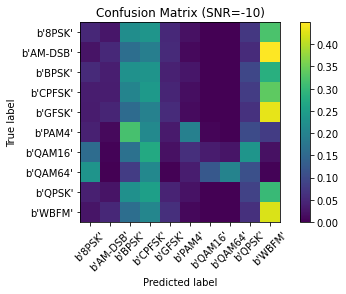

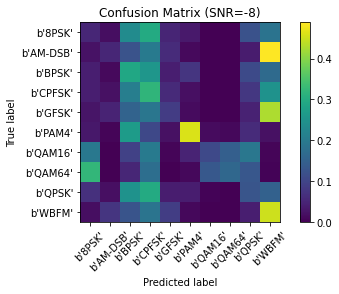

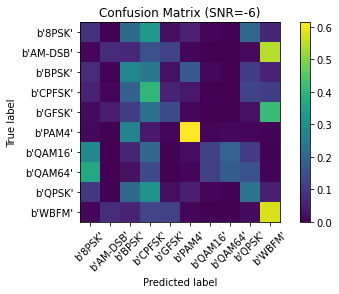

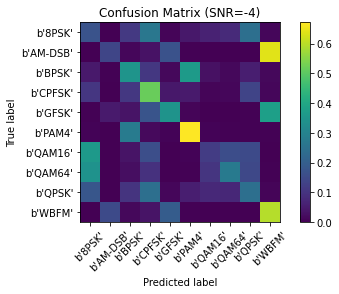

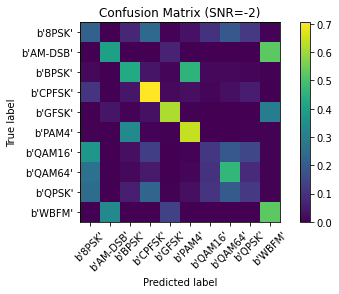

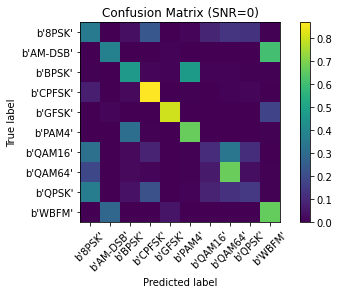

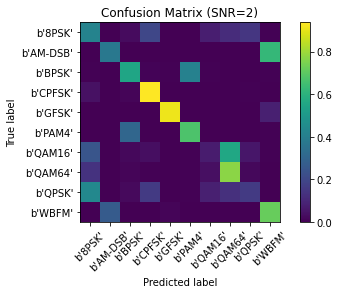

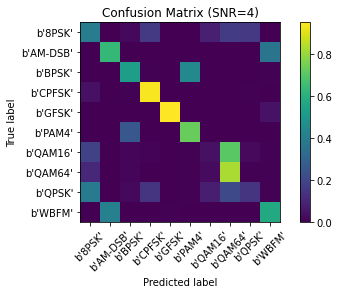

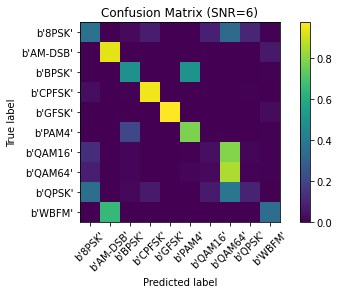

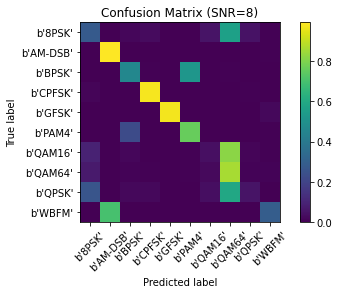

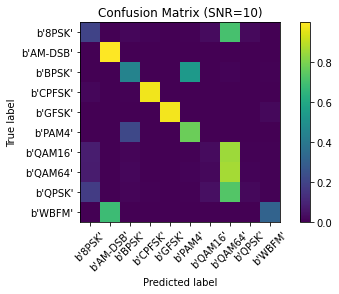

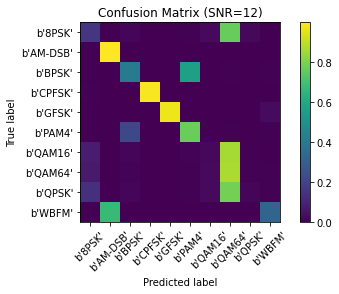

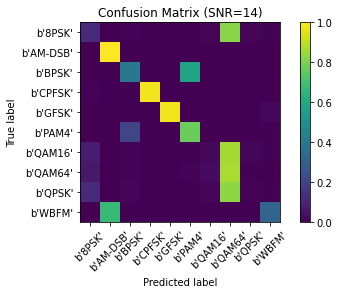

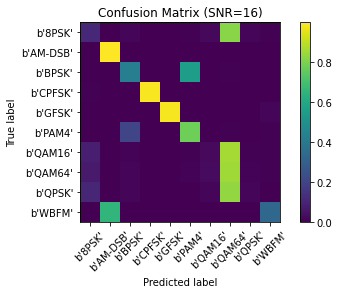

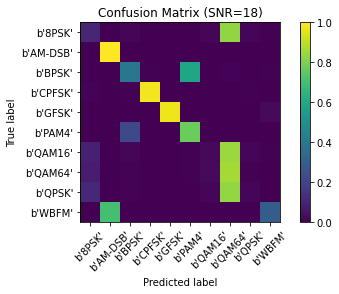

In [ ]:
acc7 = {}
for snr in snrs:

    test_SNRs_driv = list(map(lambda x: lbl[x][1], test_idx_driv))
    test_X_i_driv = X_test_driv[np.where(np.array(test_SNRs_driv)==snr)]
    test_Y_i_driv = Y_test_driv[np.where(np.array(test_SNRs_driv)==snr)]    

    test_Y_i_hat_driv = model7.predict(test_X_i_driv)
    conf7 = np.zeros([10,10])
    confnorm7 = np.zeros([10,10])
    for i in range(0,test_X_i_driv.shape[0]):
        j = list(test_Y_i_driv[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat_driv[i,:]))
        conf7[j,k] = conf7[j,k] + 1
    for i in range(0,10):
        confnorm7[i,:] = conf7[i,:] / np.sum(conf7[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm7, labels=mods, title="Confusion Matrix (SNR=%d)"%(snr))
    
    cor7 = np.sum(np.diag(conf7))
    ncor7 = np.sum(conf7) - cor7
    print ("Overall Accuracy: ", cor7 / (cor7+ncor7))
    acc7[snr] = 1.0*cor7/(cor7+ncor7)

Text(0.5, 1.0, 'RNN Classification Accuracy')

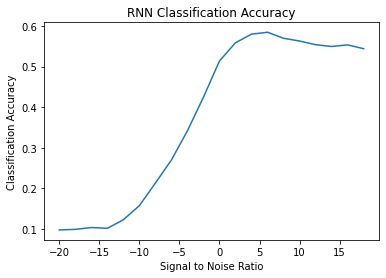

In [ ]:
plt.plot(snrs, list(map(lambda x: acc7[x], snrs)))
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("RNN Classification Accuracy")

**LSTM model for raw data**

In [ ]:
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D

model4 = Sequential()
model4.add(LSTM(64, dropout = 0.3, return_sequences = True, recurrent_dropout = 0.3, input_shape = list(X_train.shape[1:])))
model4.add(Flatten())
model4.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model4.add(Dense(10, activation = 'softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             49408     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 67,210
Trainable params: 67,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_lstm_raw = model4.fit(X_train, Y_train, epochs=200, batch_size=32, validation_split=0.05, verbose=2, callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='auto')])

Epoch 1/200
24938/24938 - 136s - loss: 1.9899 - accuracy: 0.2253 - val_loss: 1.9156 - val_accuracy: 0.2542 - 136s/epoch - 5ms/step
Epoch 2/200
24938/24938 - 129s - loss: 1.8598 - accuracy: 0.2704 - val_loss: 1.7748 - val_accuracy: 0.2956 - 129s/epoch - 5ms/step
Epoch 3/200
24938/24938 - 126s - loss: 1.7215 - accuracy: 0.3060 - val_loss: 1.5985 - val_accuracy: 0.3456 - 126s/epoch - 5ms/step
Epoch 4/200
24938/24938 - 130s - loss: 1.5741 - accuracy: 0.3508 - val_loss: 1.4950 - val_accuracy: 0.3767 - 130s/epoch - 5ms/step
Epoch 5/200
24938/24938 - 127s - loss: 1.4981 - accuracy: 0.3773 - val_loss: 1.4222 - val_accuracy: 0.4043 - 127s/epoch - 5ms/step
Epoch 6/200
24938/24938 - 128s - loss: 1.4395 - accuracy: 0.3969 - val_loss: 1.3695 - val_accuracy: 0.4225 - 128s/epoch - 5ms/step
Epoch 7/200
24938/24938 - 129s - loss: 1.4005 - accuracy: 0.4101 - val_loss: 1.3348 - val_accuracy: 0.4388 - 129s/epoch - 5ms/step
Epoch 8/200
24938/24938 - 150s - loss: 1.3797 - accuracy: 0.4175 - val_loss: 1.3182

In [ ]:
score4 = model4.evaluate(X_test, Y_test)
print(model4.metrics_names)
print (score4)

11250/11250 [==============================] - 35s 3ms/step - loss: 1.1426 - accuracy: 0.5109
['loss', 'accuracy']
[1.1425615549087524, 0.5108555555343628]


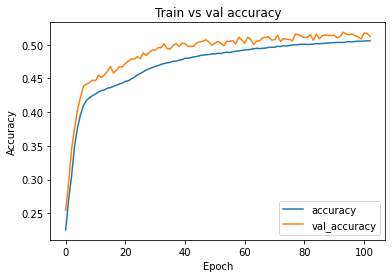

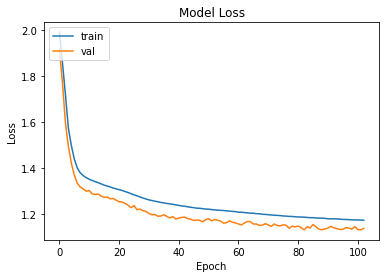

In [ ]:
plt.plot(history_lstm_raw.history['accuracy'], label='accuracy')
plt.plot(history_lstm_raw.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Train vs val accuracy")
plt.show()

plt.plot(history_lstm_raw.history['loss'])
plt.plot(history_lstm_raw.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

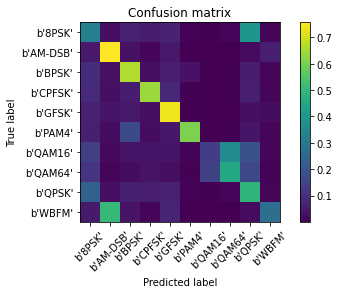

In [ ]:
test_Y_hat = model4.predict(X_test)
conf4 = np.zeros([10,10])
confnorm4 = np.zeros([10,10])
for i in range(0,X_test.shape[0]):
    j = list(Y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf4[j,k] = conf4[j,k] + 1
for i in range(0,10):
    confnorm4[i,:] = conf4[i,:] / np.sum(conf4[i,:])
plot_confusion_matrix(confnorm4, labels=mods)

Overall Accuracy:  0.10373192006183063
Overall Accuracy:  0.10819708721611518
Overall Accuracy:  0.11888696815925946
Overall Accuracy:  0.14465970632572162
Overall Accuracy:  0.18820924439523942
Overall Accuracy:  0.26667777592623454
Overall Accuracy:  0.3476722326661506
Overall Accuracy:  0.4493791251817877
Overall Accuracy:  0.5907100493320769
Overall Accuracy:  0.6656607991058955
Overall Accuracy:  0.7019594745045646
Overall Accuracy:  0.7224250470184755
Overall Accuracy:  0.7226506555029195
Overall Accuracy:  0.7308964511969501
Overall Accuracy:  0.7270405330372015
Overall Accuracy:  0.7267741399368456
Overall Accuracy:  0.723815877251501
Overall Accuracy:  0.7245276746634163
Overall Accuracy:  0.7257813368924481
Overall Accuracy:  0.7254988913525499


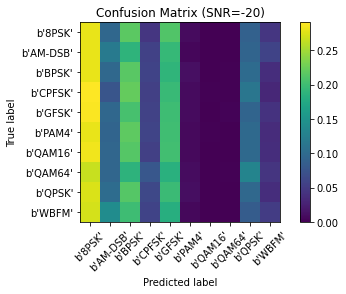

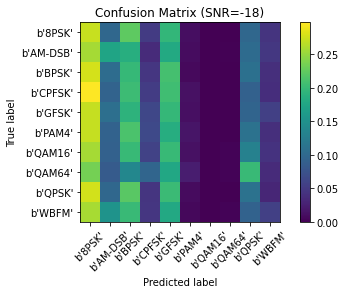

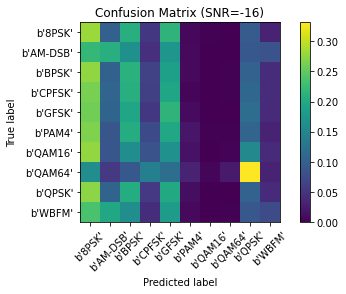

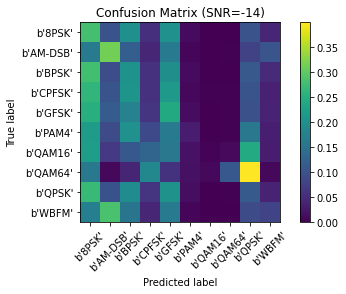

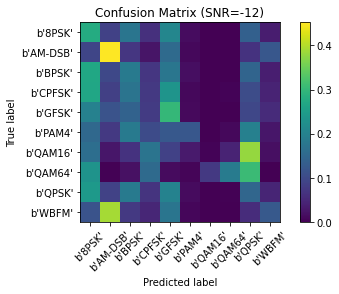

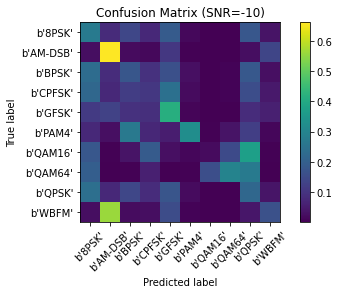

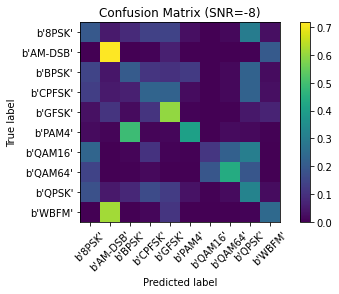

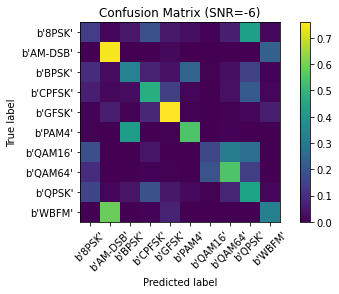

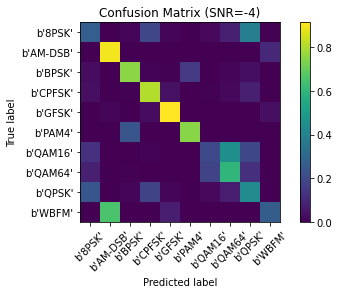

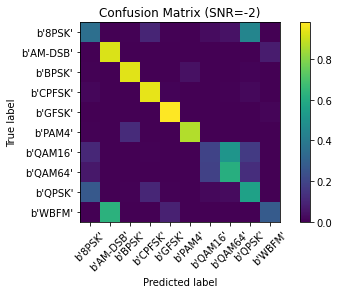

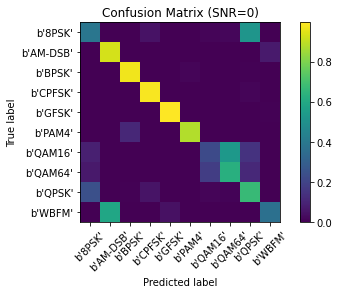

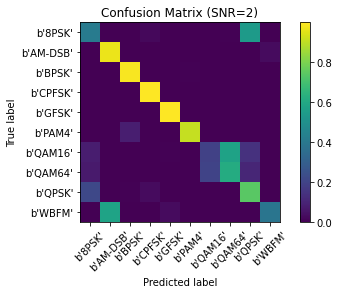

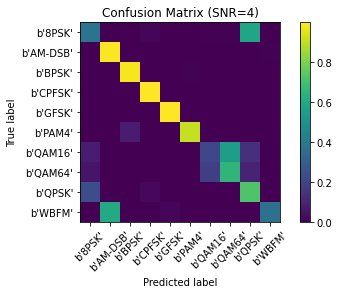

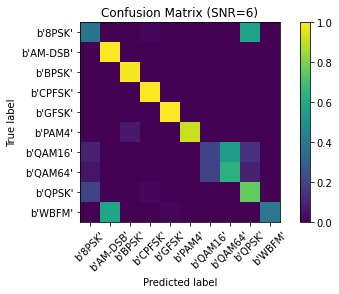

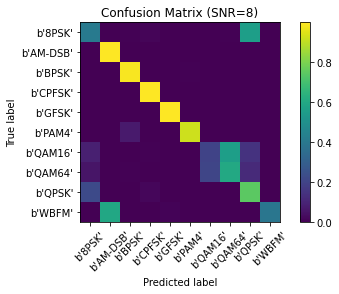

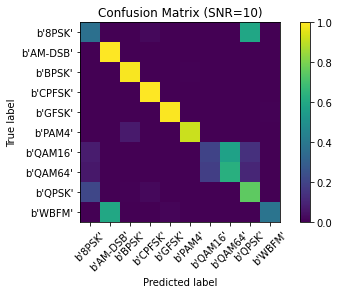

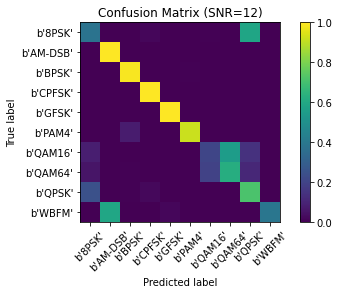

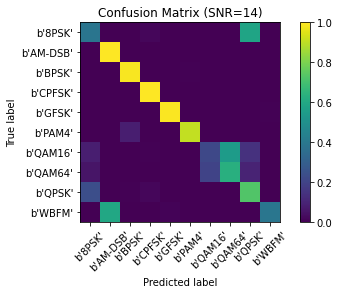

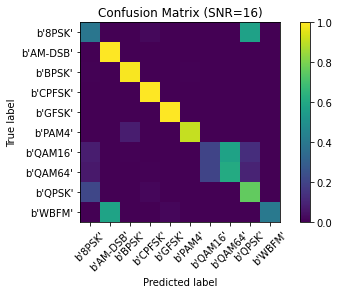

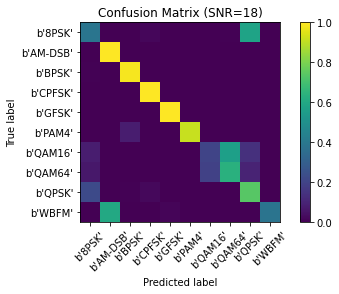

In [ ]:
acc4 = {}
for snr in snrs:

    test_SNRs = list(map(lambda x: lbl[x][1], test_idx))
    test_X_i = X_test[np.where(np.array(test_SNRs)==snr)]
    test_Y_i = Y_test[np.where(np.array(test_SNRs)==snr)]    

    test_Y_i_hat = model4.predict(test_X_i)
    conf4 = np.zeros([10,10])
    confnorm4 = np.zeros([10,10])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf4[j,k] = conf4[j,k] + 1
    for i in range(0,10):
        confnorm4[i,:] = conf4[i,:] / np.sum(conf4[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm4, labels=mods, title="Confusion Matrix (SNR=%d)"%(snr))
    
    cor4 = np.sum(np.diag(conf4))
    ncor4 = np.sum(conf4) - cor4
    print ("Overall Accuracy: ", cor4 / (cor4+ncor4))
    acc4[snr] = 1.0*cor4/(cor4+ncor4)

Text(0.5, 1.0, 'LSTM Classification Accuracy')

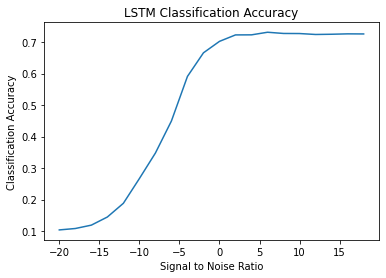

In [ ]:
plt.plot(snrs, list(map(lambda x: acc4[x], snrs)))
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("LSTM Classification Accuracy")

**LSTM model for integrals of data**

In [ ]:
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D

model6 = Sequential()
model6.add(LSTM(64, dropout = 0.3, return_sequences = True, recurrent_dropout = 0.3, input_shape = list(X_train.shape[1:])))
model6.add(Flatten())
model6.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model6.add(Dense(10, activation = 'softmax'))
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model6.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 2, 64)             49408     
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 67,210
Trainable params: 67,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_lstm_int = model6.fit(X_train_int, Y_train_int, epochs=200, batch_size=32, validation_split=0.05, verbose=2, callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='auto')])

Epoch 1/200
24938/24938 - 148s - loss: 1.7670 - accuracy: 0.2911 - val_loss: 1.6178 - val_accuracy: 0.3372 - 148s/epoch - 6ms/step
Epoch 2/200
24938/24938 - 134s - loss: 1.6164 - accuracy: 0.3363 - val_loss: 1.5477 - val_accuracy: 0.3636 - 134s/epoch - 5ms/step
Epoch 3/200
24938/24938 - 144s - loss: 1.5683 - accuracy: 0.3546 - val_loss: 1.5069 - val_accuracy: 0.3764 - 144s/epoch - 6ms/step
Epoch 4/200
24938/24938 - 138s - loss: 1.5412 - accuracy: 0.3642 - val_loss: 1.4810 - val_accuracy: 0.3921 - 138s/epoch - 6ms/step
Epoch 5/200
24938/24938 - 139s - loss: 1.5196 - accuracy: 0.3728 - val_loss: 1.4572 - val_accuracy: 0.3985 - 139s/epoch - 6ms/step
Epoch 6/200
24938/24938 - 132s - loss: 1.5016 - accuracy: 0.3804 - val_loss: 1.4391 - val_accuracy: 0.4040 - 132s/epoch - 5ms/step
Epoch 7/200
24938/24938 - 134s - loss: 1.4886 - accuracy: 0.3866 - val_loss: 1.4196 - val_accuracy: 0.4121 - 134s/epoch - 5ms/step
Epoch 8/200
24938/24938 - 131s - loss: 1.4766 - accuracy: 0.3908 - val_loss: 1.4060

In [ ]:
score6 = model6.evaluate(X_test_int, Y_test_int)
print(model6.metrics_names)
print (score6)

11250/11250 [==============================] - 33s 3ms/step - loss: 1.2822 - accuracy: 0.4721
['loss', 'accuracy']
[1.2822120189666748, 0.4721166789531708]


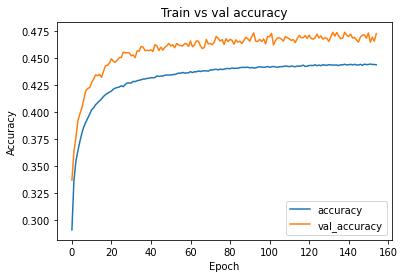

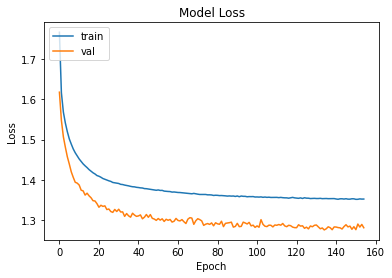

In [ ]:
plt.plot(history_lstm_int.history['accuracy'], label='accuracy')
plt.plot(history_lstm_int.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Train vs val accuracy")
plt.show()

plt.plot(history_lstm_int.history['loss'])
plt.plot(history_lstm_int.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

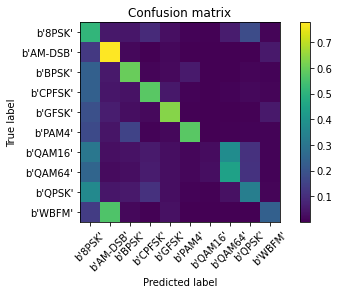

In [ ]:
test_Y_hat_int = model6.predict(X_test_int)
conf6 = np.zeros([10,10])
confnorm6 = np.zeros([10,10])
for i in range(0,X_test_int.shape[0]):
    j = list(Y_test_int[i,:]).index(1)
    k = int(np.argmax(test_Y_hat_int[i,:]))
    conf6[j,k] = conf6[j,k] + 1
for i in range(0,10):
    confnorm6[i,:] = conf6[i,:] / np.sum(conf6[i,:])
plot_confusion_matrix(confnorm6, labels=mods)

Overall Accuracy:  0.10605056862095617
Overall Accuracy:  0.11076390826404776
Overall Accuracy:  0.11899849439580662
Overall Accuracy:  0.1379599129026855
Overall Accuracy:  0.18073623027954608
Overall Accuracy:  0.25456868299727825
Overall Accuracy:  0.3370009952449408
Overall Accuracy:  0.4070365812730731
Overall Accuracy:  0.49232304195998006
Overall Accuracy:  0.5817267393126572
Overall Accuracy:  0.6405032286795814
Overall Accuracy:  0.6687133532470406
Overall Accuracy:  0.6702104219455768
Overall Accuracy:  0.677468184111678
Overall Accuracy:  0.6743475846751804
Overall Accuracy:  0.6825106642291285
Overall Accuracy:  0.6759506337558372
Overall Accuracy:  0.672281012798493
Overall Accuracy:  0.677955733511289
Overall Accuracy:  0.6731707317073171


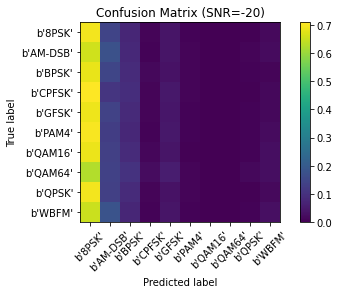

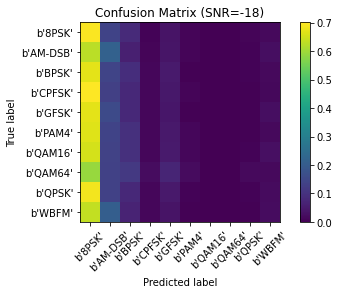

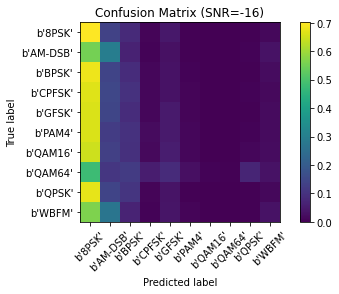

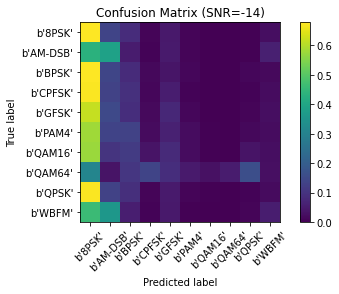

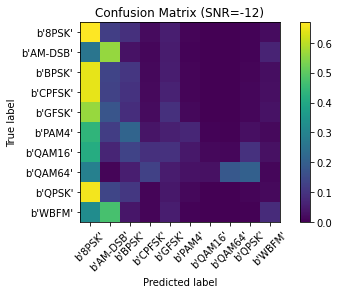

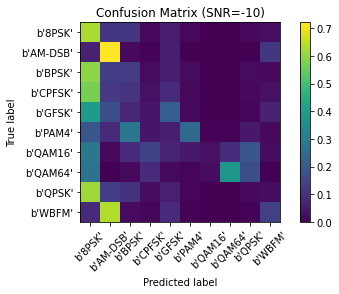

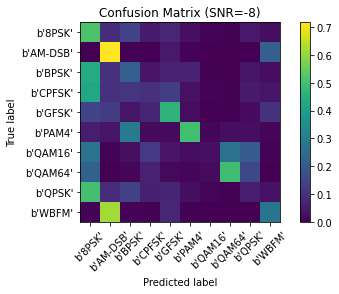

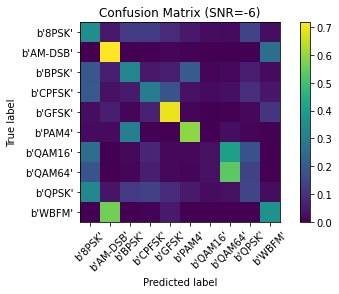

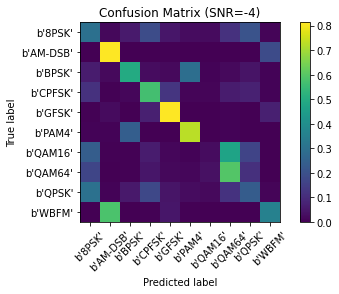

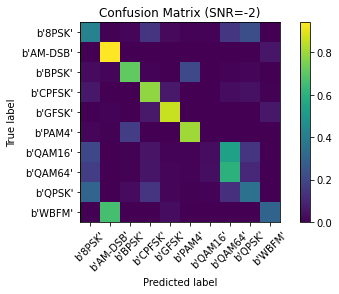

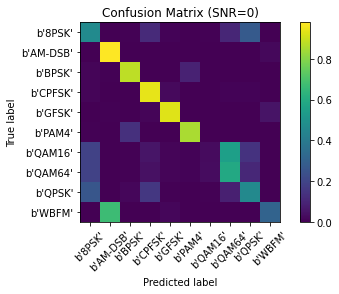

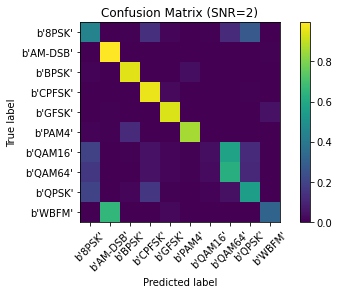

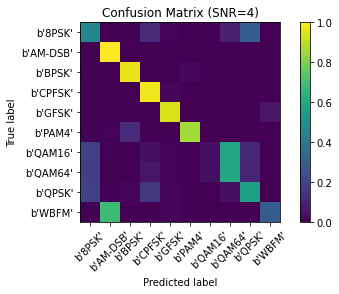

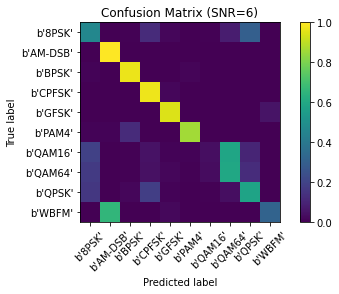

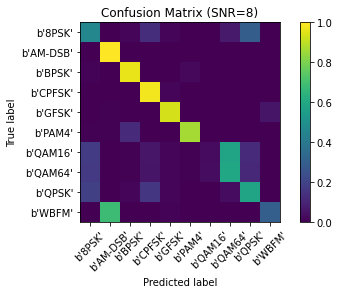

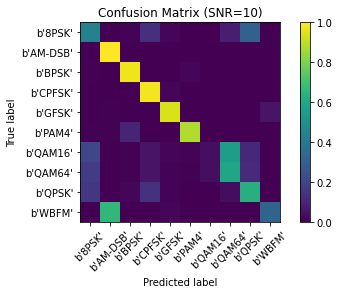

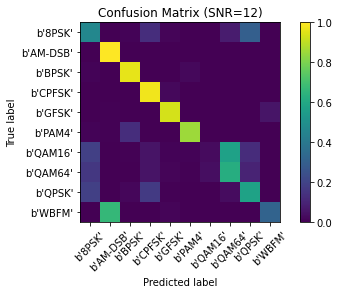

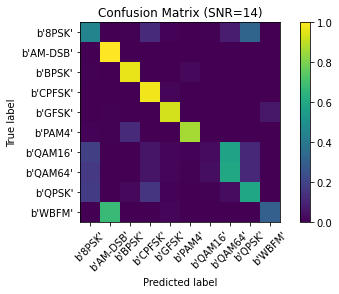

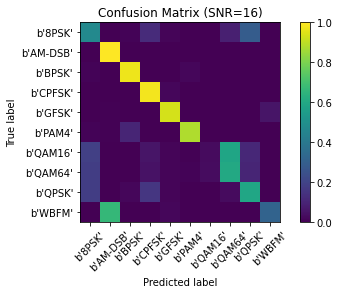

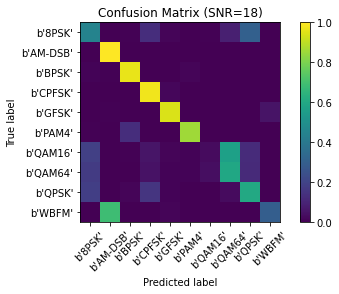

In [ ]:
acc6 = {}
for snr in snrs:

    test_SNRs_int = list(map(lambda x: lbl[x][1], test_idx_int))
    test_X_i_int = X_test_int[np.where(np.array(test_SNRs_int)==snr)]
    test_Y_i_int = Y_test_int[np.where(np.array(test_SNRs_int)==snr)]    

    test_Y_i_hat_int = model6.predict(test_X_i_int)
    conf6 = np.zeros([10,10])
    confnorm6 = np.zeros([10,10])
    for i in range(0,test_X_i_int.shape[0]):
        j = list(test_Y_i_int[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat_int[i,:]))
        conf6[j,k] = conf6[j,k] + 1
    for i in range(0,10):
        confnorm6[i,:] = conf6[i,:] / np.sum(conf6[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm6, labels=mods, title="Confusion Matrix (SNR=%d)"%(snr))
    
    cor6 = np.sum(np.diag(conf6))
    ncor6 = np.sum(conf6) - cor6
    print ("Overall Accuracy: ", cor6 / (cor6+ncor6))
    acc6[snr] = 1.0*cor6/(cor6+ncor6)

Text(0.5, 1.0, 'LSTM Classification Accuracy')

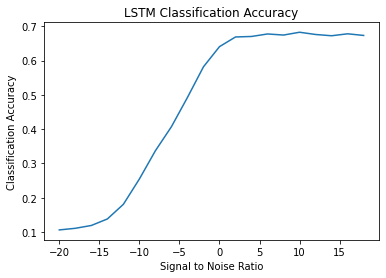

In [ ]:
plt.plot(snrs, list(map(lambda x: acc6[x], snrs)))
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("LSTM Classification Accuracy")

**LSTM model for derivatives of data**

In [ ]:
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D

model8 = Sequential()
model8.add(LSTM(64, dropout = 0.3, return_sequences = True, recurrent_dropout = 0.3, input_shape = list(X_train_driv.shape[1:])))
model8.add(Flatten())
model8.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model8.add(Dense(10, activation = 'softmax'))
model8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model8.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             49408     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 67,210
Trainable params: 67,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_lstm_driv = model8.fit(X_train_driv, Y_train_driv, epochs=100, batch_size=32, validation_split=0.05, verbose=2, callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='auto')])

Epoch 1/100
24938/24938 - 120s - loss: 2.2981 - accuracy: 0.1117 - val_loss: 2.2951 - val_accuracy: 0.1151 - 120s/epoch - 5ms/step
Epoch 2/100
24938/24938 - 120s - loss: 2.2942 - accuracy: 0.1194 - val_loss: 2.2941 - val_accuracy: 0.1158 - 120s/epoch - 5ms/step
Epoch 3/100
24938/24938 - 111s - loss: 2.2935 - accuracy: 0.1193 - val_loss: 2.2936 - val_accuracy: 0.1179 - 111s/epoch - 4ms/step
Epoch 4/100
24938/24938 - 109s - loss: 2.2931 - accuracy: 0.1200 - val_loss: 2.2930 - val_accuracy: 0.1180 - 109s/epoch - 4ms/step
Epoch 5/100
24938/24938 - 111s - loss: 2.2928 - accuracy: 0.1205 - val_loss: 2.2931 - val_accuracy: 0.1184 - 111s/epoch - 4ms/step
Epoch 6/100
24938/24938 - 111s - loss: 2.2927 - accuracy: 0.1200 - val_loss: 2.2941 - val_accuracy: 0.1159 - 111s/epoch - 4ms/step
Epoch 7/100
24938/24938 - 110s - loss: 2.2923 - accuracy: 0.1207 - val_loss: 2.2932 - val_accuracy: 0.1193 - 110s/epoch - 4ms/step
Epoch 8/100
24938/24938 - 120s - loss: 2.2922 - accuracy: 0.1204 - val_loss: 2.2930

In [ ]:
score8 = model8.evaluate(X_test_driv, Y_test_driv)
print(model8.metrics_names)
print (score8)

11250/11250 [==============================] - 28s 2ms/step - loss: 2.2946 - accuracy: 0.1201
['loss', 'accuracy']
[2.294595241546631, 0.12007778137922287]


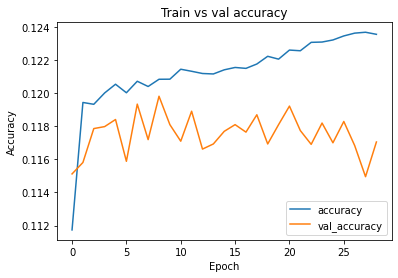

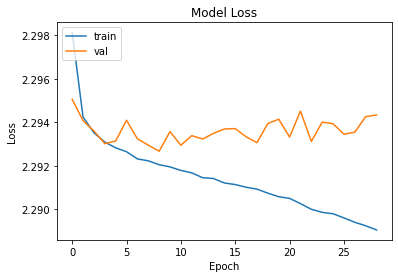

In [ ]:
plt.plot(history_lstm_driv.history['accuracy'], label='accuracy')
plt.plot(history_lstm_driv.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Train vs val accuracy")
plt.show()

plt.plot(history_lstm_driv.history['loss'])
plt.plot(history_lstm_driv.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

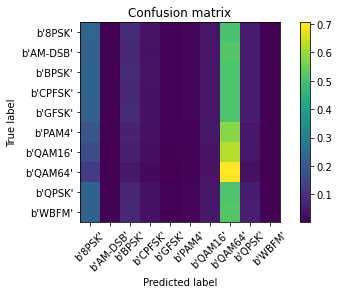

In [ ]:
test_Y_hat_driv = model8.predict(X_test_driv)
conf8 = np.zeros([10,10])
confnorm8 = np.zeros([10,10])
for i in range(0,X_test_driv.shape[0]):
    j = list(Y_test_driv[i,:]).index(1)
    k = int(np.argmax(test_Y_hat_driv[i,:]))
    conf8[j,k] = conf8[j,k] + 1
for i in range(0,10):
    confnorm8[i,:] = conf8[i,:] / np.sum(conf8[i,:])
plot_confusion_matrix(confnorm8, labels=mods)

Overall Accuracy:  0.10384233189797946
Overall Accuracy:  0.10005022041180738
Overall Accuracy:  0.10081971783862154
Overall Accuracy:  0.10289766065546313
Overall Accuracy:  0.11702186548574592
Overall Accuracy:  0.1357551519191246
Overall Accuracy:  0.1885436249032401
Overall Accuracy:  0.21294328224633627
Overall Accuracy:  0.18651959425752454
Overall Accuracy:  0.14339200894104498
Overall Accuracy:  0.10788243152972612
Overall Accuracy:  0.09962385219603938
Overall Accuracy:  0.10174066321471852
Overall Accuracy:  0.09911980714245669
Overall Accuracy:  0.09988895058300944
Overall Accuracy:  0.0973907262755526
Overall Accuracy:  0.09678674672003558
Overall Accuracy:  0.10244334866197573
Overall Accuracy:  0.10438215993771549
Overall Accuracy:  0.10083148558758315


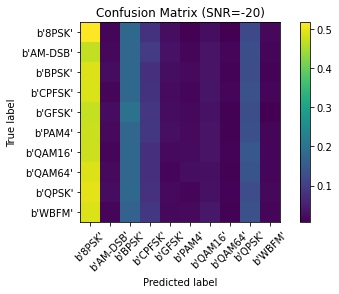

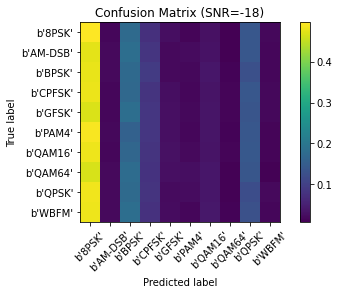

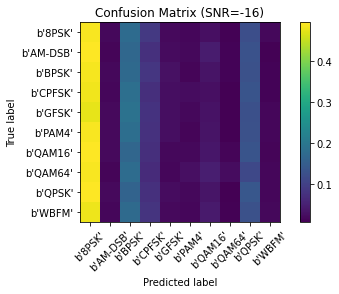

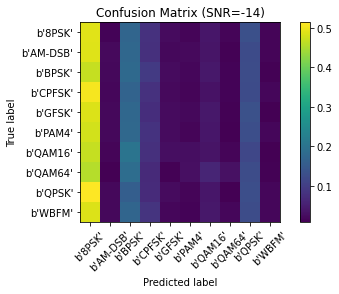

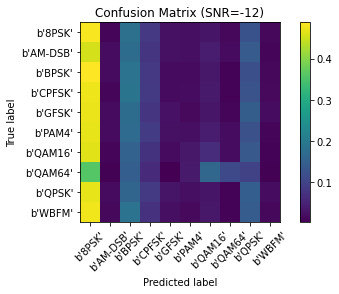

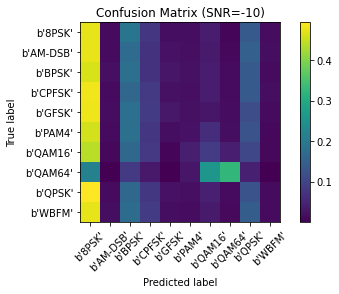

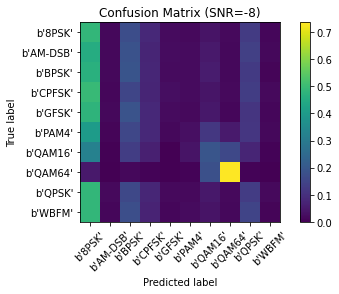

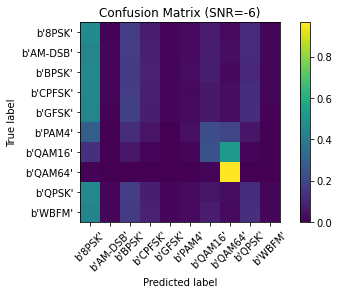

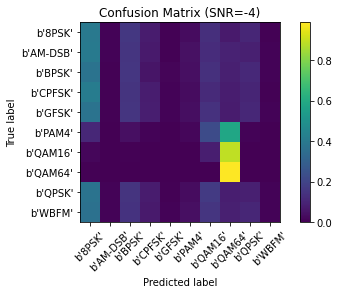

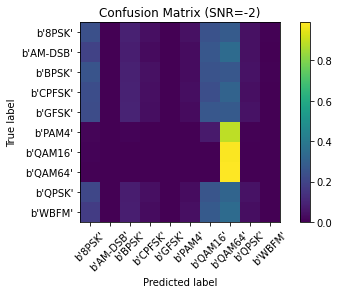

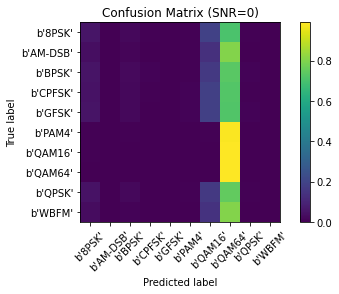

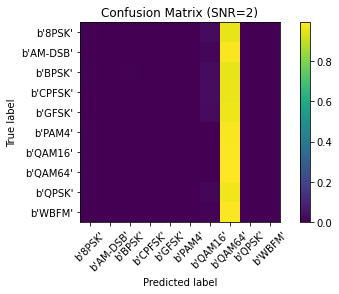

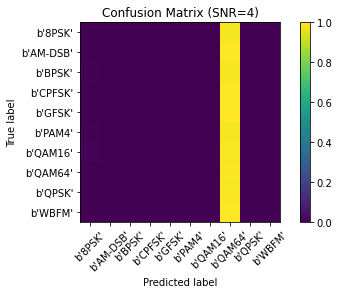

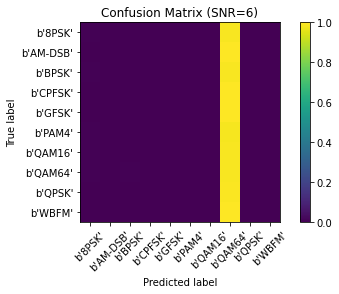

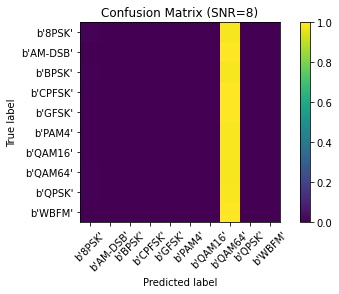

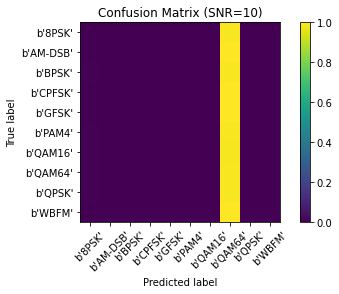

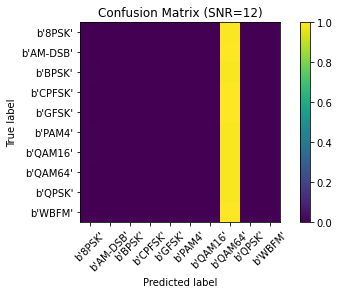

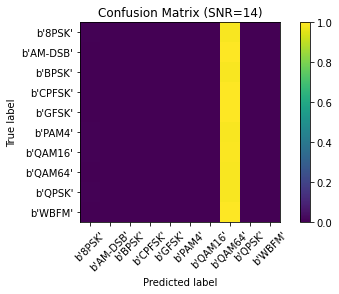

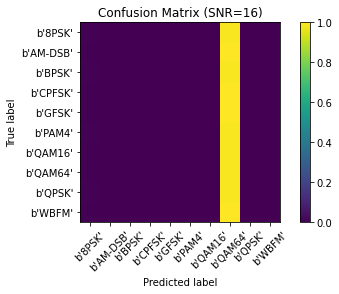

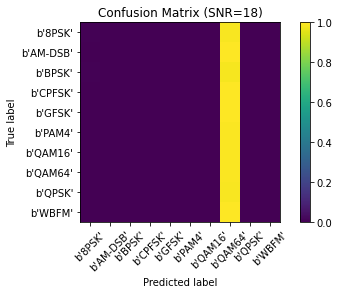

In [ ]:
acc8 = {}
for snr in snrs:

    test_SNRs_driv = list(map(lambda x: lbl[x][1], test_idx_driv))
    test_X_i_driv = X_test_driv[np.where(np.array(test_SNRs_driv)==snr)]
    test_Y_i_driv = Y_test_driv[np.where(np.array(test_SNRs_driv)==snr)]    

    test_Y_i_hat_driv = model8.predict(test_X_i_driv)
    conf8 = np.zeros([10,10])
    confnorm8 = np.zeros([10,10])
    for i in range(0,test_X_i_driv.shape[0]):
        j = list(test_Y_i_driv[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat_driv[i,:]))
        conf8[j,k] = conf8[j,k] + 1
    for i in range(0,10):
        confnorm8[i,:] = conf8[i,:] / np.sum(conf8[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm8, labels=mods, title="Confusion Matrix (SNR=%d)"%(snr))
    
    cor8 = np.sum(np.diag(conf8))
    ncor8 = np.sum(conf8) - cor8
    print ("Overall Accuracy: ", cor8 / (cor8+ncor8))
    acc8[snr] = 1.0*cor8/(cor8+ncor8)

Text(0.5, 1.0, 'LSTM Classification Accuracy')

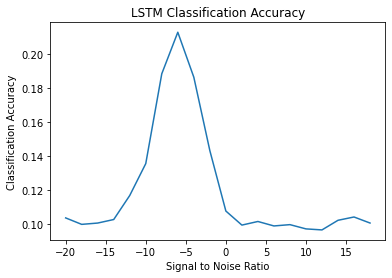

In [ ]:
plt.plot(snrs, list(map(lambda x: acc8[x], snrs)))
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("LSTM Classification Accuracy")

# **(5) Bonus**

**Fixing data dimensions**

In [ ]:
from keras.utils.np_utils import to_categorical

X_train = X_train.reshape(840000,2,1,128)
Y_train = to_categorical(Y_train[:,0], num_classes=10)
Y_train = Y_train.astype(int);

X_test = X_test.reshape(360000,2,1,128)
Y_test = to_categorical(Y_test[:,0], num_classes=10)
Y_test = Y_test.astype(int);

X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

**CONV-LSTM using raw data**

In [ ]:
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D

input_shape = (2,1,1,128)
model9 = keras.models.Sequential()
model9.add(ConvLSTM2D(64, (1, 3), activation="relu",input_shape=input_shape,strides=1,padding="same"))
model9.add(keras.layers.Flatten())
model9.add(Dense(256, activation='relu'))
model9.add(keras.layers.Dropout(0.3))
model9.add(Dense(11, activation="relu"))
model9.add(Dense(10, activation="softmax"))
model9.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model9.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_27 (ConvLSTM2D)  (None, 1, 1, 64)         147712    
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 256)               16640     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 11)                2827      
                                                                 
 dense_22 (Dense)            (None, 10)                120       
                                                                 
Total params: 167,299
Trainable params: 167,299
Non-t

In [ ]:
history_convlstm_raw = model9.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.05, verbose=2, callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='auto')])

Epoch 1/50
24938/24938 - 232s - loss: 0.3120 - accuracy: 0.8998 - val_loss: 0.3027 - val_accuracy: 0.9001 - 232s/epoch - 9ms/step
Epoch 2/50
24938/24938 - 214s - loss: 0.2954 - accuracy: 0.8998 - val_loss: 0.2906 - val_accuracy: 0.9001 - 214s/epoch - 9ms/step
Epoch 3/50
24938/24938 - 198s - loss: 0.2896 - accuracy: 0.8998 - val_loss: 0.2881 - val_accuracy: 0.9001 - 198s/epoch - 8ms/step
Epoch 4/50
24938/24938 - 198s - loss: 0.2870 - accuracy: 0.8998 - val_loss: 0.2854 - val_accuracy: 0.9001 - 198s/epoch - 8ms/step
Epoch 5/50
24938/24938 - 231s - loss: 0.2849 - accuracy: 0.8998 - val_loss: 0.2847 - val_accuracy: 0.9001 - 231s/epoch - 9ms/step
Epoch 6/50
24938/24938 - 214s - loss: 0.2831 - accuracy: 0.8998 - val_loss: 0.2846 - val_accuracy: 0.9001 - 214s/epoch - 9ms/step
Epoch 7/50
24938/24938 - 194s - loss: 0.2816 - accuracy: 0.8998 - val_loss: 0.2840 - val_accuracy: 0.9001 - 194s/epoch - 8ms/step
Epoch 8/50
24938/24938 - 198s - loss: 0.2802 - accuracy: 0.8998 - val_loss: 0.2819 - val_a

In [ ]:
score9 = model9.evaluate(X_test, Y_test)
print(model9.metrics_names)
print (score9)

11250/11250 [==============================] - 33s 3ms/step - loss: 0.2892 - accuracy: 0.9003
['loss', 'accuracy']
[0.28916457295417786, 0.9003194570541382]


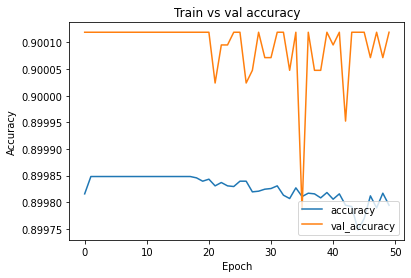

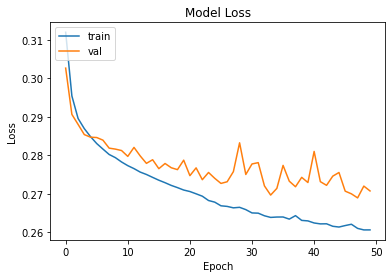

In [ ]:
plt.plot(history_convlstm_raw.history['accuracy'], label='accuracy')
plt.plot(history_convlstm_raw.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Train vs val accuracy")
plt.show()

plt.plot(history_convlstm_raw.history['loss'])
plt.plot(history_convlstm_raw.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
acc9 = {}
for snr in snrs:

    test_SNRs = list(map(lambda x: lbl[x][1], test_idx))
    test_X_i = X_test[np.where(np.array(test_SNRs)==snr)]
    test_Y_i = Y_test[np.where(np.array(test_SNRs)==snr)]    

    test_Y_i_hat = model9.predict(test_X_i)
    conf9 = np.zeros([10,10])
    confnorm9 = np.zeros([10,10])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf9[j,k] = conf9[j,k] + 1
    for i in range(0,10):
        confnorm9[i,:] = conf9[i,:] / np.sum(conf9[i,:])
    
    cor9 = np.sum(np.diag(conf9))
    ncor9 = np.sum(conf9) - cor9
    print ("Overall Accuracy: ", cor9 / (cor9+ncor9))
    acc9[snr] = 1.0*cor9/(cor9+ncor9)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


Overall Accuracy:  0.8991387876780391
Overall Accuracy:  0.8990011718096088
Overall Accuracy:  0.899626387107567
Overall Accuracy:  0.9003405728323377
Overall Accuracy:  0.8993634099086631
Overall Accuracy:  0.9012386824418153
Overall Accuracy:  0.900807254229791
Overall Accuracy:  0.9007718984226424
Overall Accuracy:  0.9029432958261737
Overall Accuracy:  0.9031573065101984
Overall Accuracy:  0.9012469383210866
Overall Accuracy:  0.8997676734152008
Overall Accuracy:  0.9021703205905035
Overall Accuracy:  0.9003756237035376
Overall Accuracy:  0.9005552470849528
Overall Accuracy:  0.8991191623732757
Overall Accuracy:  0.8966533244385145
Overall Accuracy:  0.9003822926477921
Overall Accuracy:  0.899121343565788
Overall Accuracy:  0.900609756097561


Text(0.5, 1.0, 'CONV-LSTM Classification Accuracy')

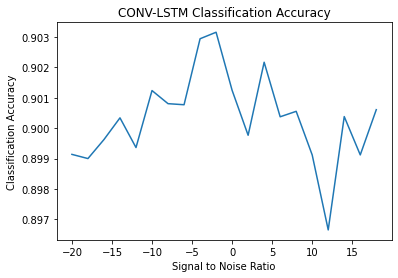

In [ ]:
plt.plot(snrs, list(map(lambda x: acc9[x], snrs)))
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("CONV-LSTM Classification Accuracy")